### **IMPORT DATA**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [129]:
df = pd.read_excel('/content/Dataset BAPOMI.xlsx')
df

,NO,CLUB,NAMA,TAHUN,L/P,TB,BB,KATEGORI FESTIVAL
0,1,ZTC BINJAI,ALIKHA CORDELIA PUTRI,2015,P,126.0,28.0,PRAKADET B
1,2,ZTC BINJAI,OCTAVANY ADELIA PUTRI,2016,P,123.0,36.0,PRAKADET B
2,3,ZTC BINJAI,KENZO ALVARO GINTING,2016,L,130.0,30.0,PRAKADET B
3,4,ZTC BINJAI,AISYAH AQILLA,2013,P,149.0,49.0,PRAKADET C
4,5,ZTC BINJAI,RIFQI SYAHBANA,2014,L,140.0,30.0,PRAKADET C
...,...,...,...,...,...,...,...,...
551,552,MIKRONOM,Wanti Octaviany Haloho,2011,P,155.0,42.0,KADET
552,553,MIKRONOM,Aulia Hutabarat,2011,P,150.0,53.0,KADET
553,554,MIKRONOM,Alwyna Purba,2011,P,159.0,58.0,KADET
554,555,MIKRONOM,Kevin Rusvinaldi,2004,L,170.0,115.0,SENIOR


### **DATA CLEANING**

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NO                 556 non-null    int64  
 1   CLUB               556 non-null    object 
 2   NAMA               556 non-null    object 
 3   TAHUN              556 non-null    int64  
 4   L/P                556 non-null    object 
 5   TB                 544 non-null    float64
 6   BB                 544 non-null    float64
 7   KATEGORI FESTIVAL  556 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 34.9+ KB


In [131]:
df = df.drop(columns=['NO'])

In [132]:
df.isnull().sum()

,0
CLUB,0
NAMA,0
TAHUN,0
L/P,0
TB,12
BB,12
KATEGORI FESTIVAL,0


In [133]:
df = df.dropna(subset=['TB', 'BB'])

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 544 entries, 0 to 555
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CLUB               544 non-null    object 
 1   NAMA               544 non-null    object 
 2   TAHUN              544 non-null    int64  
 3   L/P                544 non-null    object 
 4   TB                 544 non-null    float64
 5   BB                 544 non-null    float64
 6   KATEGORI FESTIVAL  544 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 34.0+ KB


In [135]:
print(df['KATEGORI FESTIVAL'].unique())

['PRAKADET B' 'PRAKADET C' 'KADET' 'JUNIOR' 'PRAKADET A' 'SENIOR']


In [136]:
scaler = StandardScaler()
X = df[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

### **MEMISAHKAN SETIAP KATEGORI FESTIVAL BERDASARKAN JENIS KELAMIN**

In [137]:
jumlah_peserta_per_kategori = df.groupby('KATEGORI FESTIVAL')['NAMA'].count().reset_index()
jumlah_peserta_per_kategori = jumlah_peserta_per_kategori.rename(columns={'NAMA': 'JUMLAH PESERTA'})
jumlah_peserta_per_kategori

,KATEGORI FESTIVAL,JUMLAH PESERTA
0,JUNIOR,114
1,KADET,154
2,PRAKADET A,38
3,PRAKADET B,62
4,PRAKADET C,103
5,SENIOR,73


In [138]:
festival_per_jk = df.groupby(['KATEGORI FESTIVAL', 'L/P']).size().reset_index(name='JUMLAH PESERTA')
festival_per_jk

,KATEGORI FESTIVAL,L/P,JUMLAH PESERTA
0,JUNIOR,L,75
1,JUNIOR,P,39
2,KADET,L,88
3,KADET,P,66
4,PRAKADET A,L,33
5,PRAKADET A,P,5
6,PRAKADET B,L,37
7,PRAKADET B,P,25
8,PRAKADET C,L,76
9,PRAKADET C,P,27


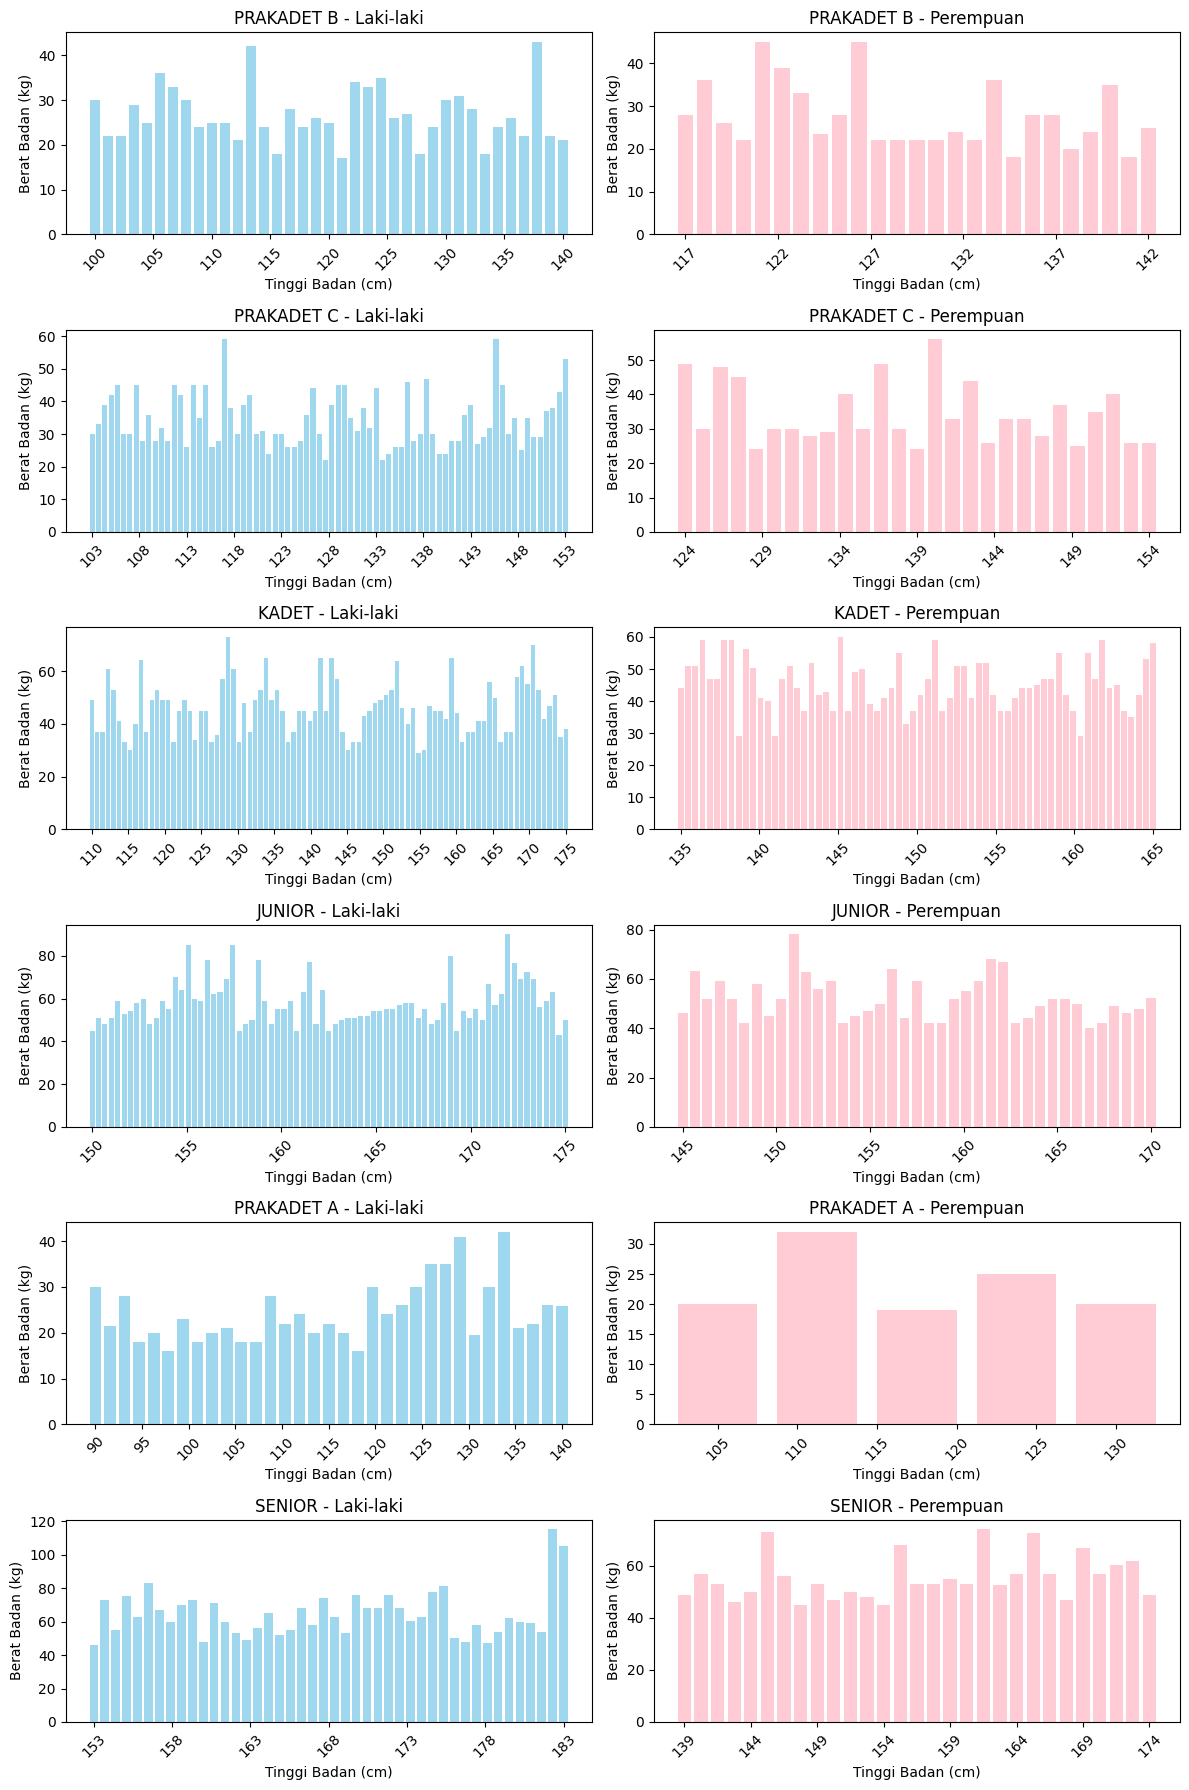

In [139]:
# Visualisasi
kategori_unik = df['KATEGORI FESTIVAL'].unique()
rows = len(kategori_unik)
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 3))

for idx, kategori in enumerate(kategori_unik):
    df_kat = df[df['KATEGORI FESTIVAL'] == kategori].reset_index(drop=True)

    df_L = df_kat[df_kat['L/P'] == 'L'].reset_index(drop=True)
    df_P = df_kat[df_kat['L/P'] == 'P'].reset_index(drop=True)

    def plot_per_peserta(ax, df_subset, color, title):
        if df_subset.empty:
            ax.set_visible(False)
            return

        ax.bar(range(len(df_subset)), df_subset['BB'], color=color, alpha=0.8)
        min_tb, max_tb = int(df_subset['TB'].min()), int(df_subset['TB'].max())
        ticks = np.arange(min_tb, max_tb+1, 5)  # step 5 cm

        ax.set_xticks(np.linspace(0, len(df_subset)-1, len(ticks)))
        ax.set_xticklabels(ticks, rotation=45)

        ax.set_title(title)
        ax.set_xlabel("Tinggi Badan (cm)")
        ax.set_ylabel("Berat Badan (kg)")

    # Subplot Laki-laki
    plot_per_peserta(axes[idx, 0], df_L, "skyblue", f"{kategori} - Laki-laki")

    # Subplot Perempuan
    plot_per_peserta(axes[idx, 1], df_P, "pink", f"{kategori} - Perempuan")

plt.tight_layout()
plt.show()


### **PRAKADET A**

### 1. LAKI-LAKI

Jumlah peserta di kategori 'PRAKADET A' Laki-laki: 33


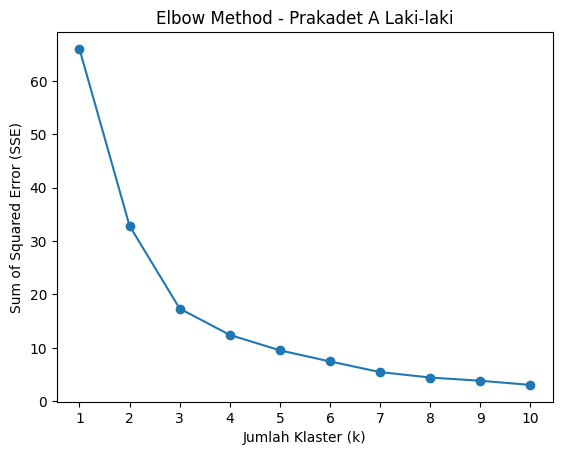


Tabel Penurunan SSE:
    k        SSE  Penurunan_SSE
0   1  66.000000            NaN
1   2  32.856562      33.143438
2   3  17.358786      15.497776
3   4  12.423200       4.935586
4   5   9.533118       2.890081
5   6   7.451034       2.082084
6   7   5.460116       1.990918
7   8   4.432346       1.027770
8   9   3.834450       0.597897
9  10   3.050180       0.784269


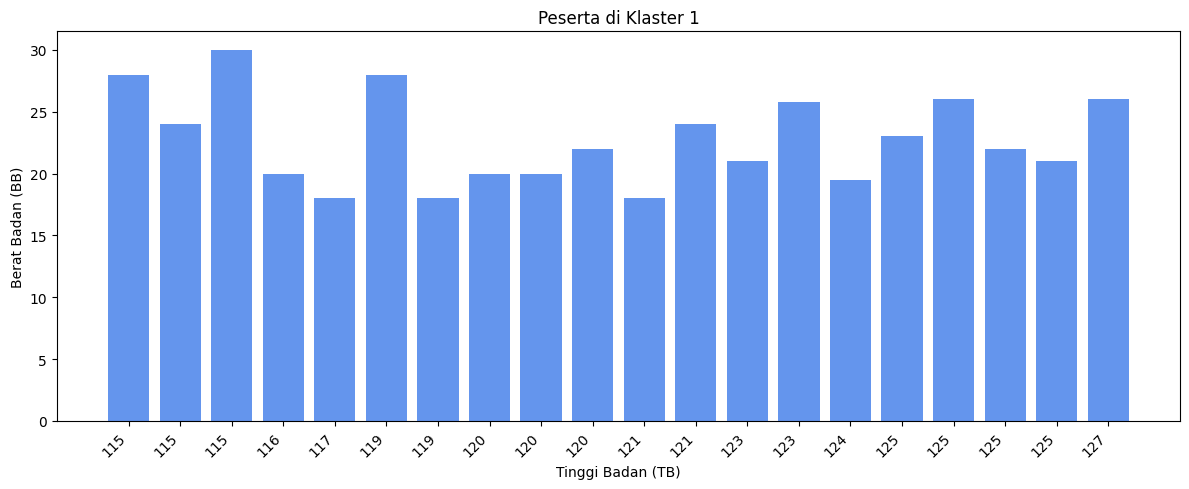


Cluster 1:
                           CLUB                               NAMA  TAHUN L/P  \
75                       HASAKU           GIBRAN ATHALLAH NASUTION   2017   L   
91                         KTTC            RAMADHAN ASHKII ALTHANI   2017   L   
161             KHENZUA FIGHTER                   MHD ARKHA AIDIEL   2017   L   
165          RAI TAEKWONDO TEAM          Jehezkiel Billy Panjaitan   2018   L   
166          RAI TAEKWONDO TEAM               Alvaro Givariel Hulu   2017   L   
167          RAI TAEKWONDO TEAM               Fairuz Azka Nugraha    2017   L   
211       TIGER SUMATERA BINJAI             HARRY AL ZIKRI TARIGAN   2017   L   
212       TIGER SUMATERA BINJAI         FABIAN ATTARSYAH KRISNANDA   2017   L   
213       TIGER SUMATERA BINJAI          MARTOGI PEREIRA SIMARMATA   2019   L   
214       TIGER SUMATERA BINJAI       KENWARD MESAKH GRAT SEBAYANG   2017   L   
215       TIGER SUMATERA BINJAI                     ABQORI ARSENIO   2017   L   
216       TIGER 

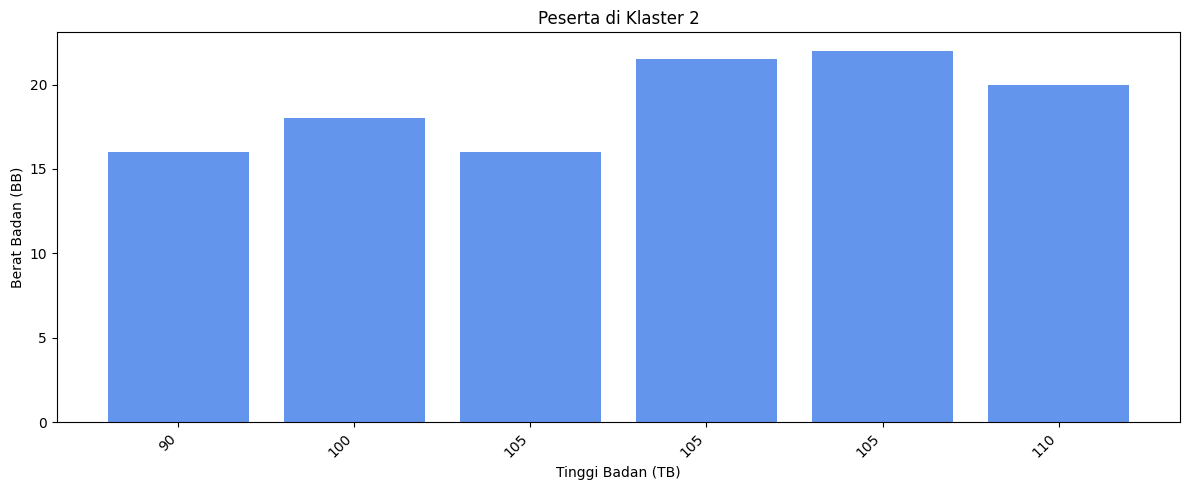


Cluster 1:
                           CLUB                               NAMA  TAHUN L/P  \
75                       HASAKU           GIBRAN ATHALLAH NASUTION   2017   L   
91                         KTTC            RAMADHAN ASHKII ALTHANI   2017   L   
161             KHENZUA FIGHTER                   MHD ARKHA AIDIEL   2017   L   
165          RAI TAEKWONDO TEAM          Jehezkiel Billy Panjaitan   2018   L   
166          RAI TAEKWONDO TEAM               Alvaro Givariel Hulu   2017   L   
167          RAI TAEKWONDO TEAM               Fairuz Azka Nugraha    2017   L   
211       TIGER SUMATERA BINJAI             HARRY AL ZIKRI TARIGAN   2017   L   
212       TIGER SUMATERA BINJAI         FABIAN ATTARSYAH KRISNANDA   2017   L   
213       TIGER SUMATERA BINJAI          MARTOGI PEREIRA SIMARMATA   2019   L   
214       TIGER SUMATERA BINJAI       KENWARD MESAKH GRAT SEBAYANG   2017   L   
215       TIGER SUMATERA BINJAI                     ABQORI ARSENIO   2017   L   
216       TIGER 

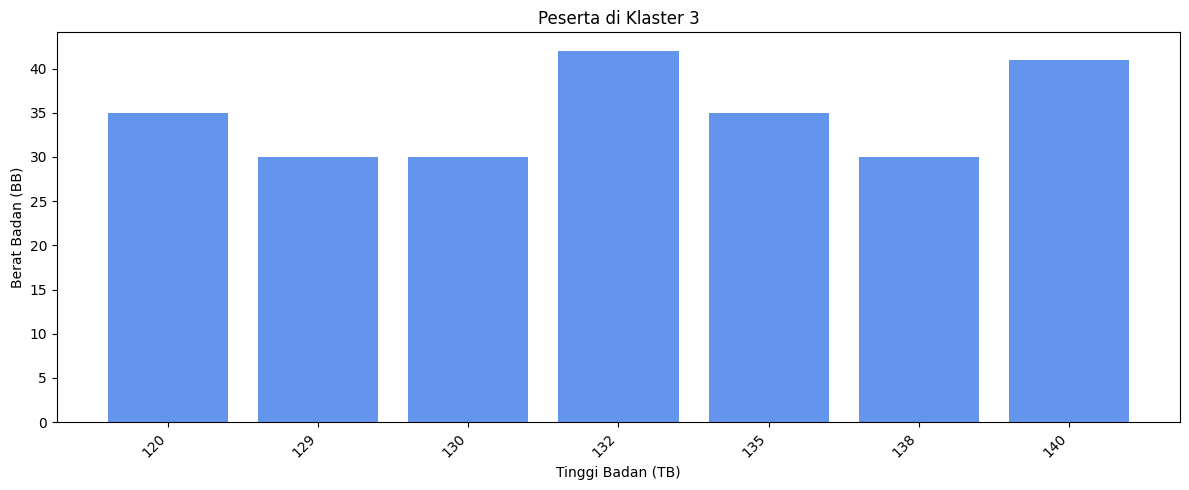


Cluster 1:
                           CLUB                               NAMA  TAHUN L/P  \
75                       HASAKU           GIBRAN ATHALLAH NASUTION   2017   L   
91                         KTTC            RAMADHAN ASHKII ALTHANI   2017   L   
161             KHENZUA FIGHTER                   MHD ARKHA AIDIEL   2017   L   
165          RAI TAEKWONDO TEAM          Jehezkiel Billy Panjaitan   2018   L   
166          RAI TAEKWONDO TEAM               Alvaro Givariel Hulu   2017   L   
167          RAI TAEKWONDO TEAM               Fairuz Azka Nugraha    2017   L   
211       TIGER SUMATERA BINJAI             HARRY AL ZIKRI TARIGAN   2017   L   
212       TIGER SUMATERA BINJAI         FABIAN ATTARSYAH KRISNANDA   2017   L   
213       TIGER SUMATERA BINJAI          MARTOGI PEREIRA SIMARMATA   2019   L   
214       TIGER SUMATERA BINJAI       KENWARD MESAKH GRAT SEBAYANG   2017   L   
215       TIGER SUMATERA BINJAI                     ABQORI ARSENIO   2017   L   
216       TIGER 

In [140]:
# Menampilkan Kembali Jumlah Peserta
prakadet_a_lk = df[(df['KATEGORI FESTIVAL'] == 'PRAKADET A') & (df['L/P'] == 'L')]
print(f"Jumlah peserta di kategori 'PRAKADET A' Laki-laki: {len(prakadet_a_lk)}")

#Proses Metode Elbow
X = prakadet_a_lk[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Prakadet A Laki-laki')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

prakadet_a_lk_clustered = prakadet_a_lk.copy()
prakadet_a_lk_clustered['cluster'] = labels

for cluster_label in sorted(prakadet_a_lk_clustered['cluster'].unique()):
    cluster_data = prakadet_a_lk_clustered[prakadet_a_lk_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
      print(f"\nCluster {cluster_id + 1}:")
      print(prakadet_a_lk_clustered[prakadet_a_lk_clustered['cluster'] == cluster_id])


### 2. PEREMPUAN

Jumlah peserta di kategori 'PRAKADET A' Perempuan: 5


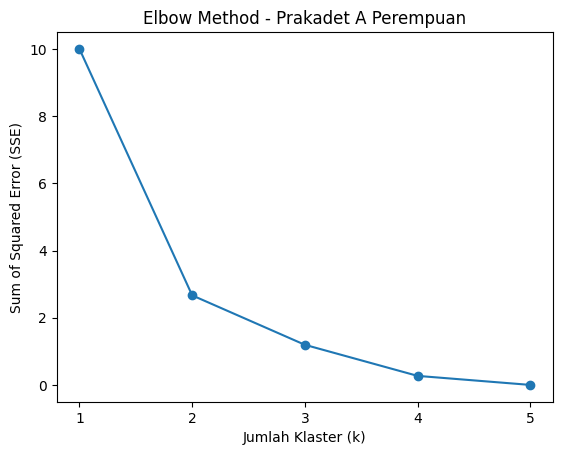


Tabel Penurunan SSE:
   k        SSE  Penurunan_SSE
0  1  10.000000            NaN
1  2   2.665297       7.334703
2  3   1.193624       1.471673
3  4   0.268841       0.924783
4  5   0.000000       0.268841


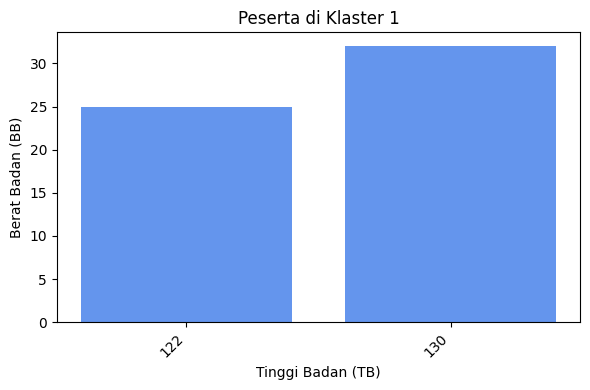


Cluster 1:
                   CLUB                  NAMA  TAHUN L/P     TB    BB  \
291  SIBAYAK LIONS CLUB  ALEXA TERESIA HAREFA   2013   P  130.0  32.0   
342      Golden Warrior            Cut Meymey   2017   P  122.0  25.0   

    KATEGORI FESTIVAL  cluster  
291        PRAKADET A        0  
342        PRAKADET A        0  

Cluster 2:
                           CLUB                       NAMA  TAHUN L/P     TB  \
112    Ar-rahman Taekwondo Club  Shofiyah Ayudisa Alfarisi   2018   P  112.0   
325  Macan Taekwondo Club Medan      Lathifah Azmah Kirana   2017   P  118.0   
422                    JOHOR TC           Luthfiana Marsya   2017   P  105.0   

       BB KATEGORI FESTIVAL  cluster  
112  20.0        PRAKADET A        1  
325  19.0        PRAKADET A        1  
422  20.0        PRAKADET A        1  


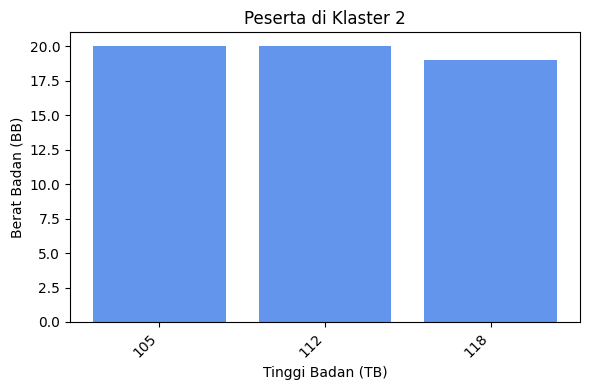


Cluster 1:
                   CLUB                  NAMA  TAHUN L/P     TB    BB  \
291  SIBAYAK LIONS CLUB  ALEXA TERESIA HAREFA   2013   P  130.0  32.0   
342      Golden Warrior            Cut Meymey   2017   P  122.0  25.0   

    KATEGORI FESTIVAL  cluster  
291        PRAKADET A        0  
342        PRAKADET A        0  

Cluster 2:
                           CLUB                       NAMA  TAHUN L/P     TB  \
112    Ar-rahman Taekwondo Club  Shofiyah Ayudisa Alfarisi   2018   P  112.0   
325  Macan Taekwondo Club Medan      Lathifah Azmah Kirana   2017   P  118.0   
422                    JOHOR TC           Luthfiana Marsya   2017   P  105.0   

       BB KATEGORI FESTIVAL  cluster  
112  20.0        PRAKADET A        1  
325  19.0        PRAKADET A        1  
422  20.0        PRAKADET A        1  


In [141]:
# Menampilkan Kembali Jumlah Peserta
prakadet_a_pr = df[(df['KATEGORI FESTIVAL'] == 'PRAKADET A') & (df['L/P'] == 'P')]
print(f"Jumlah peserta di kategori 'PRAKADET A' Perempuan: {len(prakadet_a_pr)}")

#Proses Metode Elbow
X = prakadet_a_pr[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker='o')
plt.xticks(range(1, 6))
plt.title('Elbow Method - Prakadet A Perempuan')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 2
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

prakadet_a_pr_clustered = prakadet_a_pr.copy()
prakadet_a_pr_clustered['cluster'] = labels

for cluster_label in sorted(prakadet_a_pr_clustered['cluster'].unique()):
    cluster_data = prakadet_a_pr_clustered[prakadet_a_pr_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(6, 4))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(prakadet_a_pr_clustered[prakadet_a_pr_clustered['cluster'] == cluster_id])

### **PRAKADET B**

### 1. LAKI-LAKI

Jumlah peserta di kategori 'PRAKADET B' Laki-laki: 37


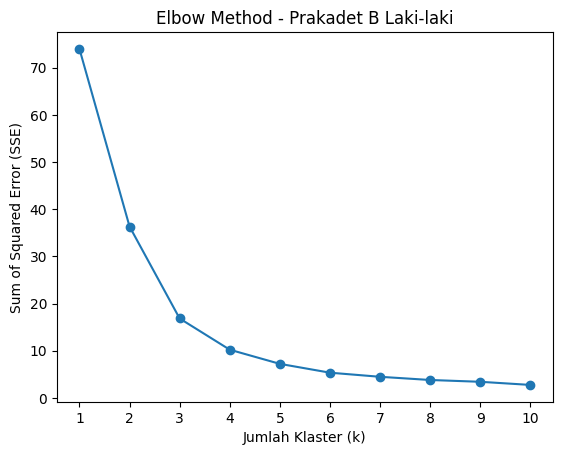


Tabel Penurunan SSE:
    k        SSE  Penurunan_SSE
0   1  74.000000            NaN
1   2  36.346832      37.653168
2   3  16.845419      19.501414
3   4  10.226689       6.618730
4   5   7.225625       3.001063
5   6   5.353724       1.871901
6   7   4.483154       0.870570
7   8   3.805564       0.677590
8   9   3.424279       0.381285
9  10   2.760064       0.664215


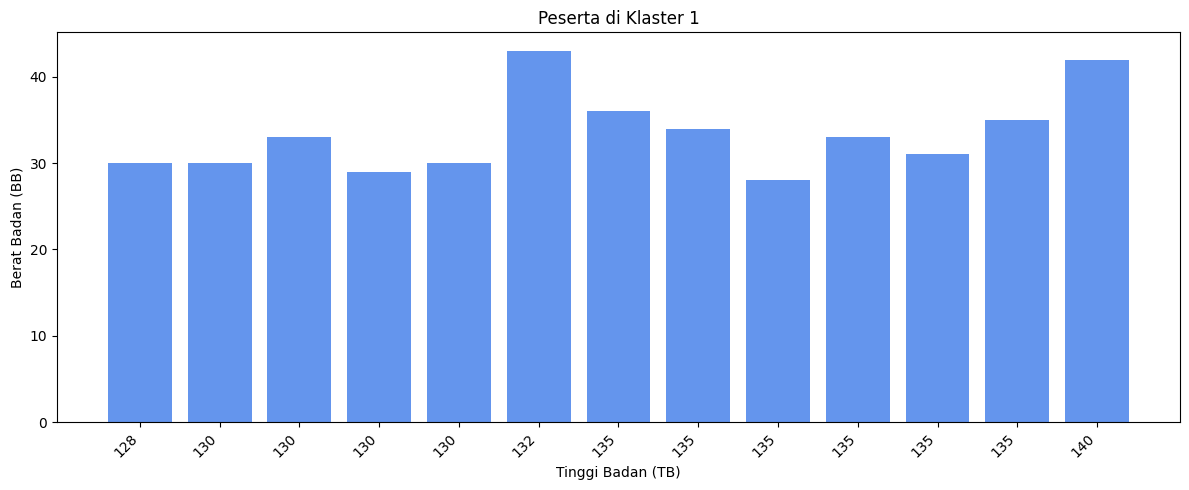


Cluster 1:
                   CLUB                       NAMA  TAHUN L/P     TB    BB  \
2            ZTC BINJAI       KENZO ALVARO GINTING   2016   L  130.0  30.0   
38            MAVERICKS             GABRIEL MANALU   2015   L  130.0  29.0   
77               HASAKU      CLAUDIO TIMOTHY MANIK   2015   L  135.0  36.0   
123        TI BATU BARA               ALMALIK AQWA   2016   L  130.0  33.0   
124        TI BATU BARA             DAFFA PRASETYO   2015   L  130.0  30.0   
169  RAI TAEKWONDO TEAM         Hauzan Irhab Nabil   2015   L  140.0  42.0   
361                 PTA       FATHIR ABIGAIL MASKA   2015   L  135.0  34.0   
362                 PTA     LOUIS TRISTAN MARANATA   2015   L  135.0  33.0   
369    Simpang Selayang             Muhammed Keano   2015   L  135.0  35.0   
377         PAB SAENTIS           AL-KAHFI GIFHARI   2015   L  128.0  30.0   
410      UNPRI TKD CLUB  Aldrik El Kareem Marpaung   2016   L  135.0  31.0   
411      UNPRI TKD CLUB       Zeeshan Ahmad Waruwu  

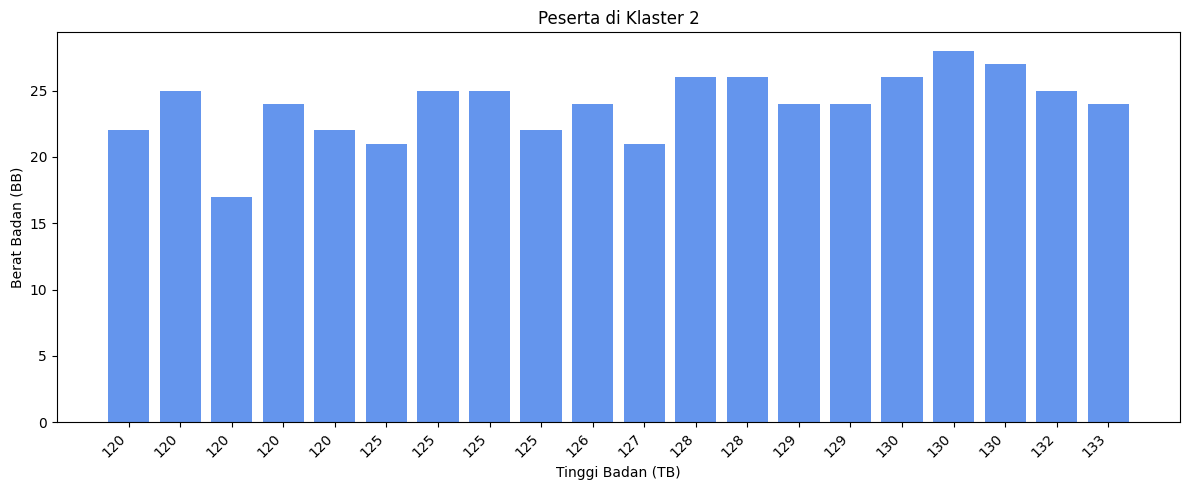


Cluster 1:
                   CLUB                       NAMA  TAHUN L/P     TB    BB  \
2            ZTC BINJAI       KENZO ALVARO GINTING   2016   L  130.0  30.0   
38            MAVERICKS             GABRIEL MANALU   2015   L  130.0  29.0   
77               HASAKU      CLAUDIO TIMOTHY MANIK   2015   L  135.0  36.0   
123        TI BATU BARA               ALMALIK AQWA   2016   L  130.0  33.0   
124        TI BATU BARA             DAFFA PRASETYO   2015   L  130.0  30.0   
169  RAI TAEKWONDO TEAM         Hauzan Irhab Nabil   2015   L  140.0  42.0   
361                 PTA       FATHIR ABIGAIL MASKA   2015   L  135.0  34.0   
362                 PTA     LOUIS TRISTAN MARANATA   2015   L  135.0  33.0   
369    Simpang Selayang             Muhammed Keano   2015   L  135.0  35.0   
377         PAB SAENTIS           AL-KAHFI GIFHARI   2015   L  128.0  30.0   
410      UNPRI TKD CLUB  Aldrik El Kareem Marpaung   2016   L  135.0  31.0   
411      UNPRI TKD CLUB       Zeeshan Ahmad Waruwu  

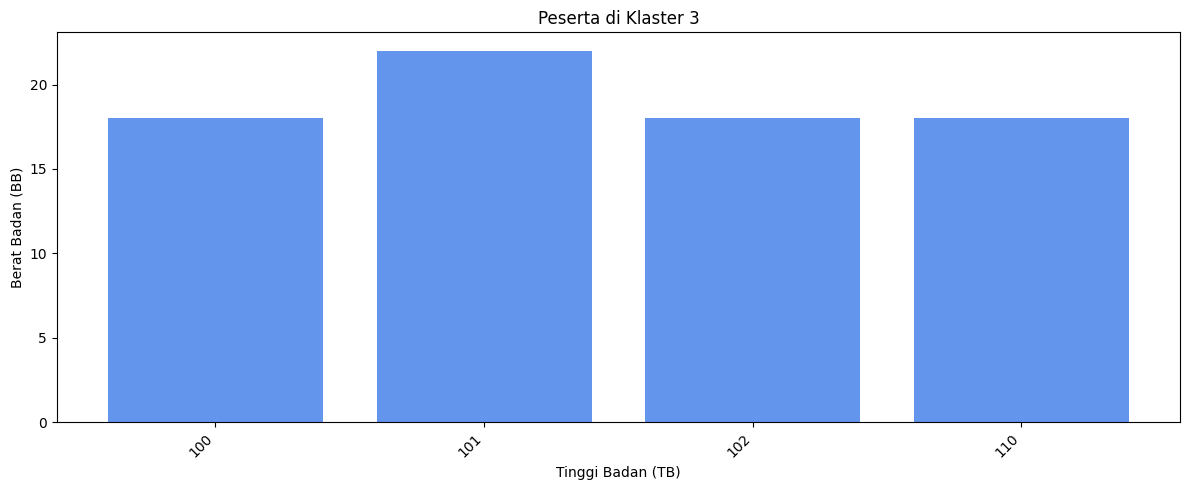


Cluster 1:
                   CLUB                       NAMA  TAHUN L/P     TB    BB  \
2            ZTC BINJAI       KENZO ALVARO GINTING   2016   L  130.0  30.0   
38            MAVERICKS             GABRIEL MANALU   2015   L  130.0  29.0   
77               HASAKU      CLAUDIO TIMOTHY MANIK   2015   L  135.0  36.0   
123        TI BATU BARA               ALMALIK AQWA   2016   L  130.0  33.0   
124        TI BATU BARA             DAFFA PRASETYO   2015   L  130.0  30.0   
169  RAI TAEKWONDO TEAM         Hauzan Irhab Nabil   2015   L  140.0  42.0   
361                 PTA       FATHIR ABIGAIL MASKA   2015   L  135.0  34.0   
362                 PTA     LOUIS TRISTAN MARANATA   2015   L  135.0  33.0   
369    Simpang Selayang             Muhammed Keano   2015   L  135.0  35.0   
377         PAB SAENTIS           AL-KAHFI GIFHARI   2015   L  128.0  30.0   
410      UNPRI TKD CLUB  Aldrik El Kareem Marpaung   2016   L  135.0  31.0   
411      UNPRI TKD CLUB       Zeeshan Ahmad Waruwu  

In [142]:
# Menampilkan Kembali Jumlah Peserta
prakadet_b_lk = df[(df['KATEGORI FESTIVAL'] == 'PRAKADET B') & (df['L/P'] == 'L')]
print(f"Jumlah peserta di kategori 'PRAKADET B' Laki-laki: {len(prakadet_b_lk)}")

# Proses Metode Elbow
X = prakadet_b_lk[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Prakadet B Laki-laki')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

prakadet_b_lk_clustered = prakadet_b_lk.copy()
prakadet_b_lk_clustered['cluster'] = labels

for cluster_label in sorted(prakadet_b_lk_clustered['cluster'].unique()):
    cluster_data = prakadet_b_lk_clustered[prakadet_b_lk_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(prakadet_b_lk_clustered[prakadet_b_lk_clustered['cluster'] == cluster_id])

### 2. PEREMPUAN

Jumlah peserta di kategori 'PRAKADET B' Perempuan: 25


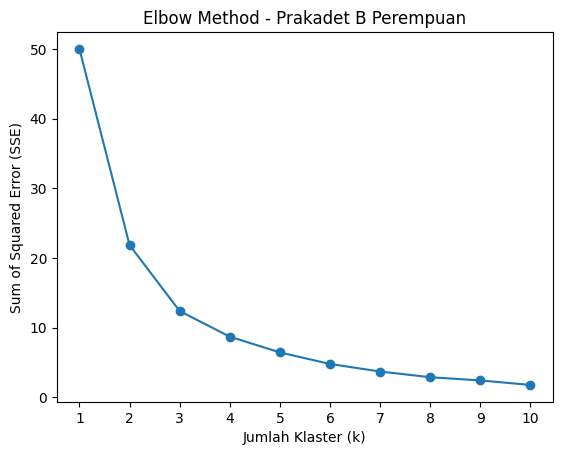


Tabel Penurunan SSE:
    k        SSE  Penurunan_SSE
0   1  50.000000            NaN
1   2  21.841617      28.158383
2   3  12.372403       9.469214
3   4   8.693867       3.678536
4   5   6.433817       2.260051
5   6   4.776201       1.657616
6   7   3.689523       1.086678
7   8   2.872029       0.817494
8   9   2.410951       0.461079
9  10   1.765308       0.645643


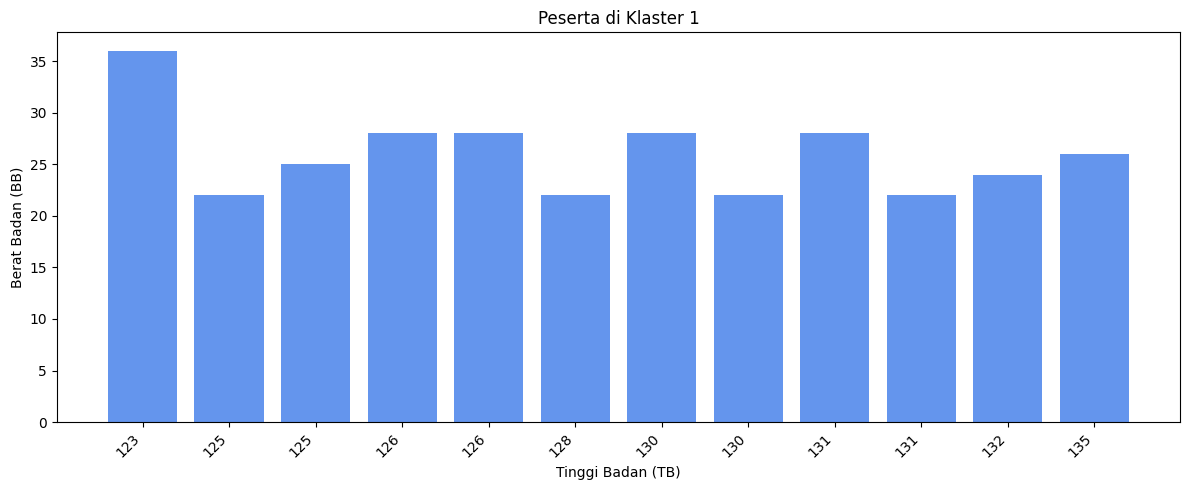


Cluster 1:
                      CLUB                               NAMA  TAHUN L/P  \
0               ZTC BINJAI              ALIKHA CORDELIA PUTRI   2015   P   
1               ZTC BINJAI              OCTAVANY ADELIA PUTRI   2016   P   
20   HTC PUTRA JAYA STABAT          Farriisha Ivana Togatorop   2016   P   
21   HTC PUTRA JAYA STABAT        Annisa Syaudiya Azalia Eisa   2016   P   
106         Durin tonggal            Fika Flora Br Gurusinga    2014   P   
135          RAJAWALI CLUB           Salsa Bila Sekar Lathifa   2015   P   
221  TIGER SUMATERA BINJAI   STANISVANIA GALVANI BR SIMARMATA   2016   P   
222  TIGER SUMATERA BINJAI              KIANDRA ANAIA GINTING   2015   P   
227  TIGER SUMATERA BINJAI                ARSHYFA SATYA AYURI   2016   P   
343         Golden Warrior  Aulia Salsabila Br Perangin-angin   2015   P   
379            PAB SAENTIS                MAHIRA HASNA KAMILA   2015   P   
458                    GSM             KEYSHA KAIRINA RITONGA   2016   P   


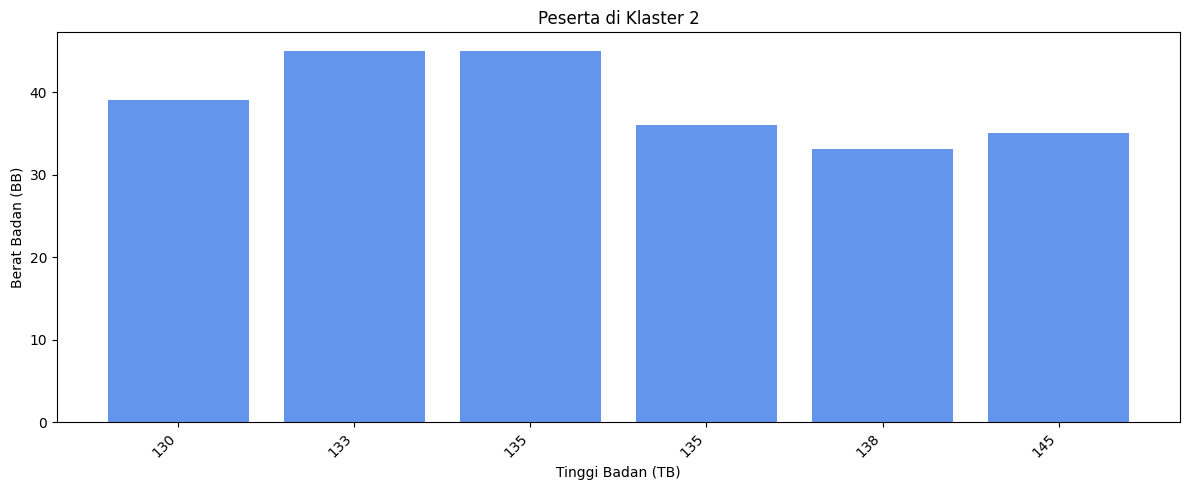


Cluster 1:
                      CLUB                               NAMA  TAHUN L/P  \
0               ZTC BINJAI              ALIKHA CORDELIA PUTRI   2015   P   
1               ZTC BINJAI              OCTAVANY ADELIA PUTRI   2016   P   
20   HTC PUTRA JAYA STABAT          Farriisha Ivana Togatorop   2016   P   
21   HTC PUTRA JAYA STABAT        Annisa Syaudiya Azalia Eisa   2016   P   
106         Durin tonggal            Fika Flora Br Gurusinga    2014   P   
135          RAJAWALI CLUB           Salsa Bila Sekar Lathifa   2015   P   
221  TIGER SUMATERA BINJAI   STANISVANIA GALVANI BR SIMARMATA   2016   P   
222  TIGER SUMATERA BINJAI              KIANDRA ANAIA GINTING   2015   P   
227  TIGER SUMATERA BINJAI                ARSHYFA SATYA AYURI   2016   P   
343         Golden Warrior  Aulia Salsabila Br Perangin-angin   2015   P   
379            PAB SAENTIS                MAHIRA HASNA KAMILA   2015   P   
458                    GSM             KEYSHA KAIRINA RITONGA   2016   P   


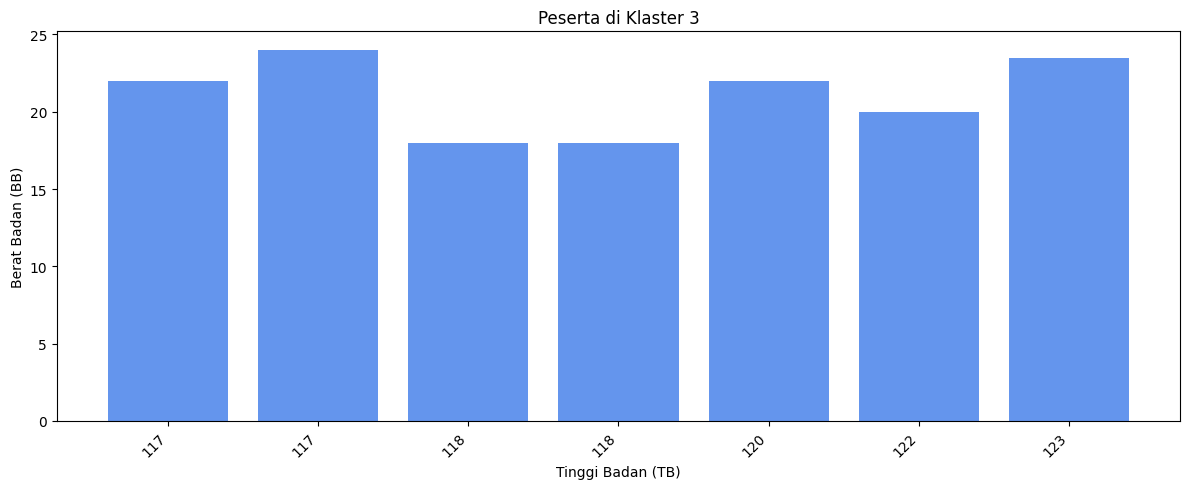


Cluster 1:
                      CLUB                               NAMA  TAHUN L/P  \
0               ZTC BINJAI              ALIKHA CORDELIA PUTRI   2015   P   
1               ZTC BINJAI              OCTAVANY ADELIA PUTRI   2016   P   
20   HTC PUTRA JAYA STABAT          Farriisha Ivana Togatorop   2016   P   
21   HTC PUTRA JAYA STABAT        Annisa Syaudiya Azalia Eisa   2016   P   
106         Durin tonggal            Fika Flora Br Gurusinga    2014   P   
135          RAJAWALI CLUB           Salsa Bila Sekar Lathifa   2015   P   
221  TIGER SUMATERA BINJAI   STANISVANIA GALVANI BR SIMARMATA   2016   P   
222  TIGER SUMATERA BINJAI              KIANDRA ANAIA GINTING   2015   P   
227  TIGER SUMATERA BINJAI                ARSHYFA SATYA AYURI   2016   P   
343         Golden Warrior  Aulia Salsabila Br Perangin-angin   2015   P   
379            PAB SAENTIS                MAHIRA HASNA KAMILA   2015   P   
458                    GSM             KEYSHA KAIRINA RITONGA   2016   P   


In [143]:
# Menampilkan Kembali Jumlah Peserta
prakadet_b_pr = df[(df['KATEGORI FESTIVAL'] == 'PRAKADET B') & (df['L/P'] == 'P')]
print(f"Jumlah peserta di kategori 'PRAKADET B' Perempuan: {len(prakadet_b_pr)}")

# Proses Metode Elbow
X = prakadet_b_pr[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Prakadet B Perempuan')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

prakadet_b_pr_clustered = prakadet_b_pr.copy()
prakadet_b_pr_clustered['cluster'] = labels

for cluster_label in sorted(prakadet_b_pr_clustered['cluster'].unique()):
    cluster_data = prakadet_b_pr_clustered[prakadet_b_pr_clustered['cluster'] == cluster_label]

    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(prakadet_b_pr_clustered[prakadet_b_pr_clustered['cluster'] == cluster_id])

### **PRAKADET C**

### 1. LAKI-LAKI

Jumlah peserta di kategori 'PRAKADET C' Laki-laki: 76


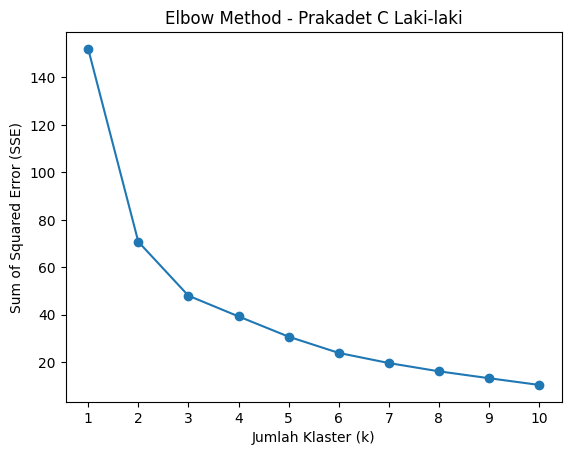


Tabel Penurunan SSE:
    k         SSE  Penurunan_SSE
0   1  152.000000            NaN
1   2   70.753883      81.246117
2   3   48.029029      22.724854
3   4   39.296384       8.732645
4   5   30.759654       8.536730
5   6   23.912070       6.847584
6   7   19.642195       4.269874
7   8   16.158956       3.483239
8   9   13.253845       2.905111
9  10   10.425953       2.827892


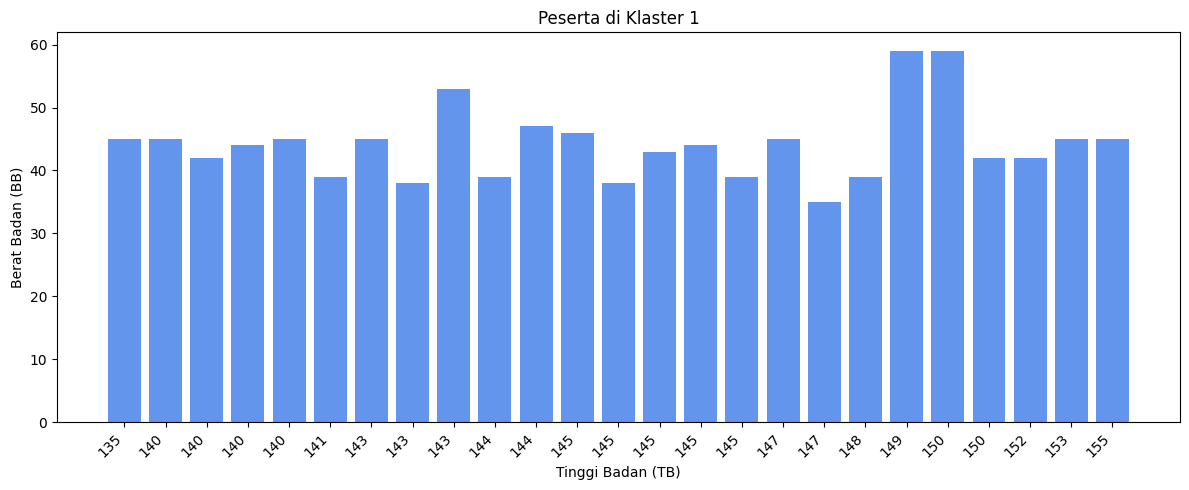


Cluster 1:
                           CLUB                            NAMA  TAHUN L/P  \
6                    ZTC BINJAI        AZKA ABQARY AZMI SIAHAAN   2013   L   
7                    ZTC BINJAI          ALARIC TRISTAN TARIGAN   2013   L   
8                    ZTC BINJAI        LIONEL HABIBINTA MELIALA   2013   L   
47                    MAVERICKS                     ROBI SARAGI   2014   L   
79                       HASAKU                   KEANU ALFATAN   2013   L   
80                       HASAKU            FAIZ HABIBI BUDIMAN    2013   L   
82                       HASAKU               MHD AZZAM SYAZANI   2013   L   
136               RAJAWALI CLUB             Arda Yulianda Putra   2013   L   
147                  MTC SERGAI        GIANO AZHRIEL HUTAGALUNG   2013   L   
170          RAI TAEKWONDO TEAM              Andrian  Surbakti    2014   L   
233       TIGER SUMATERA BINJAI           MUHAMMAD FAREL ADETYA   2013   L   
236       TIGER SUMATERA BINJAI        FADHILLAH AKB

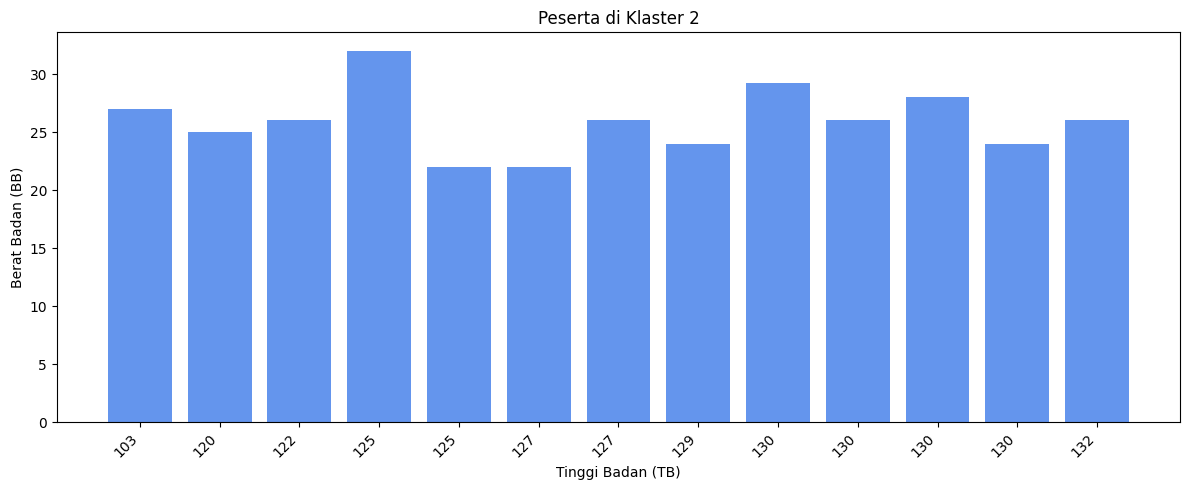


Cluster 1:
                           CLUB                            NAMA  TAHUN L/P  \
6                    ZTC BINJAI        AZKA ABQARY AZMI SIAHAAN   2013   L   
7                    ZTC BINJAI          ALARIC TRISTAN TARIGAN   2013   L   
8                    ZTC BINJAI        LIONEL HABIBINTA MELIALA   2013   L   
47                    MAVERICKS                     ROBI SARAGI   2014   L   
79                       HASAKU                   KEANU ALFATAN   2013   L   
80                       HASAKU            FAIZ HABIBI BUDIMAN    2013   L   
82                       HASAKU               MHD AZZAM SYAZANI   2013   L   
136               RAJAWALI CLUB             Arda Yulianda Putra   2013   L   
147                  MTC SERGAI        GIANO AZHRIEL HUTAGALUNG   2013   L   
170          RAI TAEKWONDO TEAM              Andrian  Surbakti    2014   L   
233       TIGER SUMATERA BINJAI           MUHAMMAD FAREL ADETYA   2013   L   
236       TIGER SUMATERA BINJAI        FADHILLAH AKB

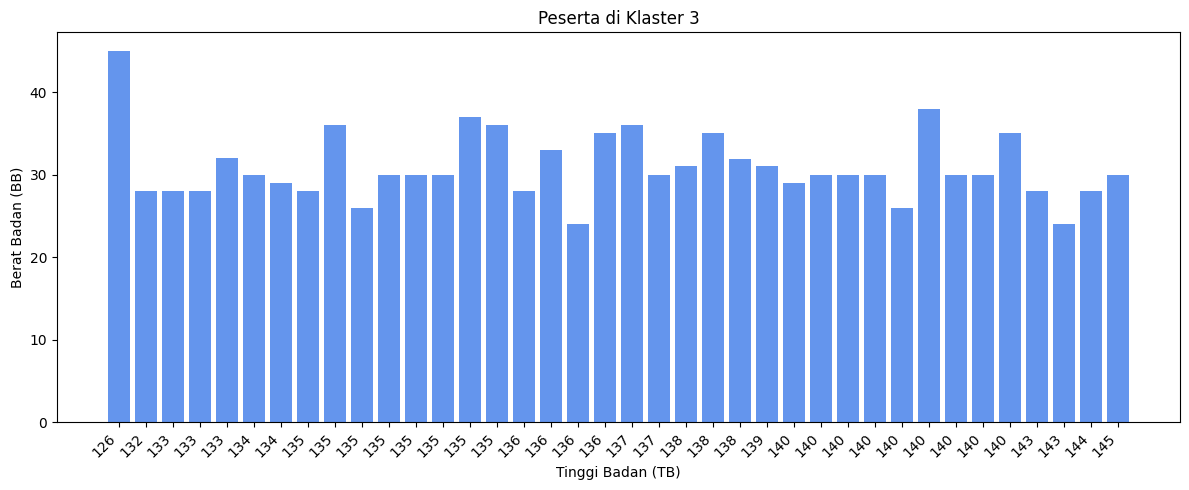


Cluster 1:
                           CLUB                            NAMA  TAHUN L/P  \
6                    ZTC BINJAI        AZKA ABQARY AZMI SIAHAAN   2013   L   
7                    ZTC BINJAI          ALARIC TRISTAN TARIGAN   2013   L   
8                    ZTC BINJAI        LIONEL HABIBINTA MELIALA   2013   L   
47                    MAVERICKS                     ROBI SARAGI   2014   L   
79                       HASAKU                   KEANU ALFATAN   2013   L   
80                       HASAKU            FAIZ HABIBI BUDIMAN    2013   L   
82                       HASAKU               MHD AZZAM SYAZANI   2013   L   
136               RAJAWALI CLUB             Arda Yulianda Putra   2013   L   
147                  MTC SERGAI        GIANO AZHRIEL HUTAGALUNG   2013   L   
170          RAI TAEKWONDO TEAM              Andrian  Surbakti    2014   L   
233       TIGER SUMATERA BINJAI           MUHAMMAD FAREL ADETYA   2013   L   
236       TIGER SUMATERA BINJAI        FADHILLAH AKB

In [144]:
# Menampilkan Kembali Jumlah Peserta
prakadet_c_lk = df[(df['KATEGORI FESTIVAL'] == 'PRAKADET C') & (df['L/P'] == 'L')]
print(f"Jumlah peserta di kategori 'PRAKADET C' Laki-laki: {len(prakadet_c_lk)}")

# Proses Metode Elbow
X = prakadet_c_lk[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Prakadet C Laki-laki')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

prakadet_c_lk_clustered = prakadet_c_lk.copy()
prakadet_c_lk_clustered['cluster'] = labels

for cluster_label in sorted(prakadet_c_lk_clustered['cluster'].unique()):
    cluster_data = prakadet_c_lk_clustered[prakadet_c_lk_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(prakadet_c_lk_clustered[prakadet_c_lk_clustered['cluster'] == cluster_id])

### 2. PEREMPUAN

Jumlah peserta di kategori 'PRAKADET C' Perempuan: 27


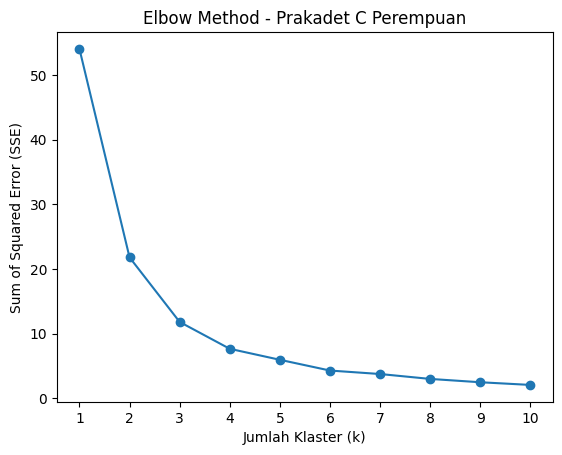


Tabel Penurunan SSE:
    k        SSE  Penurunan_SSE
0   1  54.000000            NaN
1   2  21.797971      32.202029
2   3  11.822477       9.975494
3   4   7.673616       4.148860
4   5   5.976507       1.697109
5   6   4.315998       1.660509
6   7   3.777872       0.538126
7   8   3.021290       0.756582
8   9   2.506437       0.514853
9  10   2.093934       0.412502


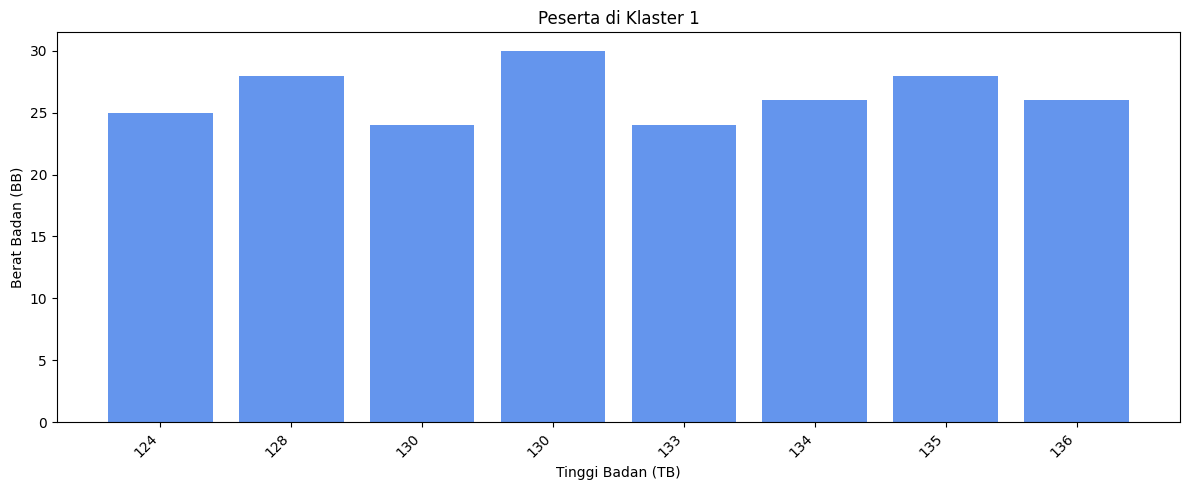


Cluster 1:
               CLUB                          NAMA  TAHUN L/P     TB    BB  \
42        MAVERICKS             MELATI QUEN MALAU   2013   P  130.0  24.0   
46        MAVERICKS           ELIF CESYA SIHOTANG   2014   P  135.0  28.0   
126    TI BATU BARA  MEILITKA MEHULIKA BR GINTING   2014   P  130.0  30.0   
200     ALAM LEUSER       YUMNA SHIDQIYYAH RAHMAN   2013   P  133.0  24.0   
385     PAB SAENTIS            AIRY BUNGA CANTIKA   2014   P  134.0  26.0   
388     PAB SAENTIS                IZZAH INSYIRAH   2013   P  128.0  28.0   
413  UNPRI TKD CLUB        Medina Syahira Habibah   2013   P  124.0  25.0   
432    TBBC BELAWAN         ALINKA YUAN SYAHPUTRI   2013   P  136.0  26.0   

    KATEGORI FESTIVAL  cluster  
42         PRAKADET C        0  
46         PRAKADET C        0  
126        PRAKADET C        0  
200        PRAKADET C        0  
385        PRAKADET C        0  
388        PRAKADET C        0  
413        PRAKADET C        0  
432        PRAKADET C        0

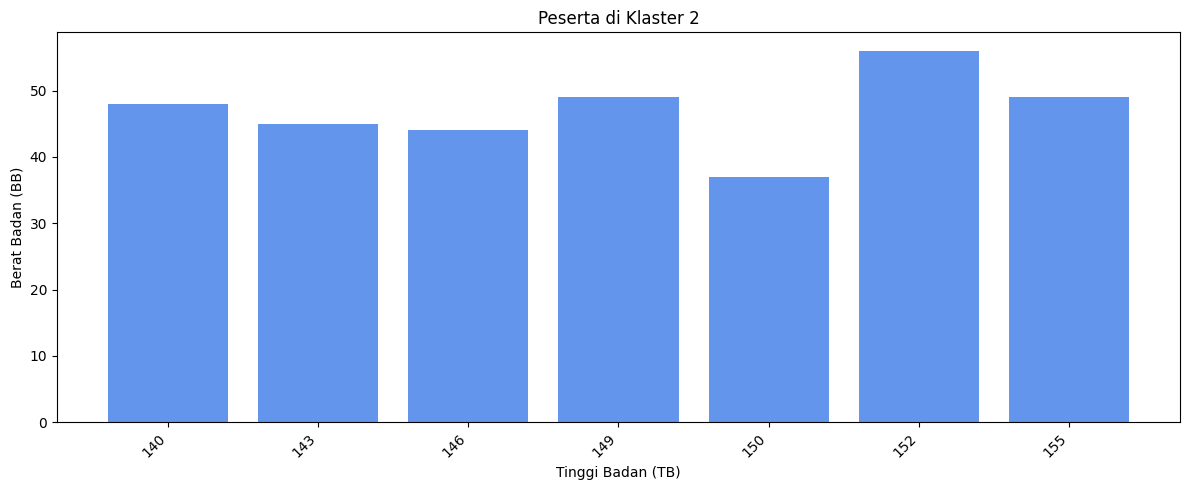


Cluster 1:
               CLUB                          NAMA  TAHUN L/P     TB    BB  \
42        MAVERICKS             MELATI QUEN MALAU   2013   P  130.0  24.0   
46        MAVERICKS           ELIF CESYA SIHOTANG   2014   P  135.0  28.0   
126    TI BATU BARA  MEILITKA MEHULIKA BR GINTING   2014   P  130.0  30.0   
200     ALAM LEUSER       YUMNA SHIDQIYYAH RAHMAN   2013   P  133.0  24.0   
385     PAB SAENTIS            AIRY BUNGA CANTIKA   2014   P  134.0  26.0   
388     PAB SAENTIS                IZZAH INSYIRAH   2013   P  128.0  28.0   
413  UNPRI TKD CLUB        Medina Syahira Habibah   2013   P  124.0  25.0   
432    TBBC BELAWAN         ALINKA YUAN SYAHPUTRI   2013   P  136.0  26.0   

    KATEGORI FESTIVAL  cluster  
42         PRAKADET C        0  
46         PRAKADET C        0  
126        PRAKADET C        0  
200        PRAKADET C        0  
385        PRAKADET C        0  
388        PRAKADET C        0  
413        PRAKADET C        0  
432        PRAKADET C        0

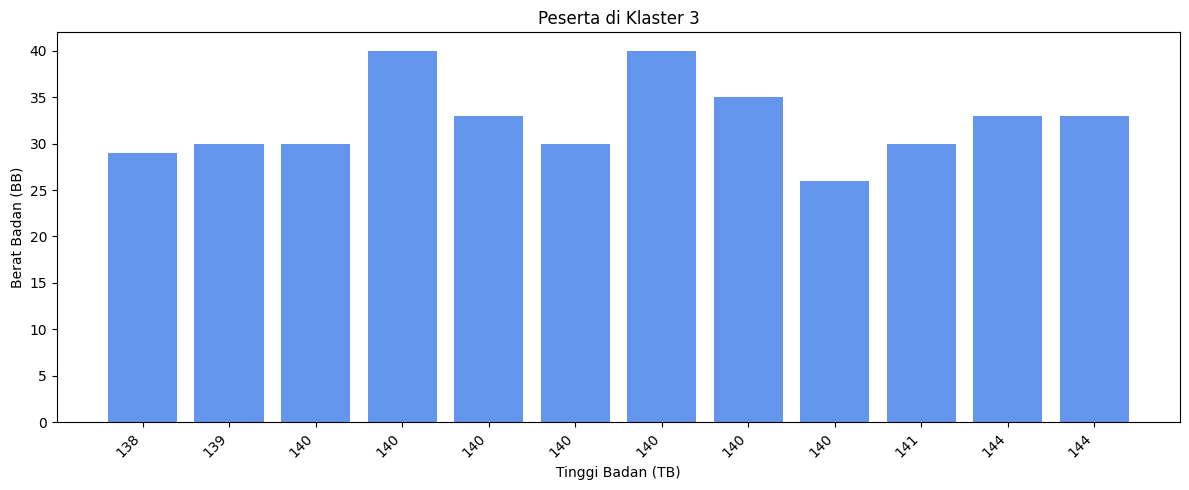


Cluster 1:
               CLUB                          NAMA  TAHUN L/P     TB    BB  \
42        MAVERICKS             MELATI QUEN MALAU   2013   P  130.0  24.0   
46        MAVERICKS           ELIF CESYA SIHOTANG   2014   P  135.0  28.0   
126    TI BATU BARA  MEILITKA MEHULIKA BR GINTING   2014   P  130.0  30.0   
200     ALAM LEUSER       YUMNA SHIDQIYYAH RAHMAN   2013   P  133.0  24.0   
385     PAB SAENTIS            AIRY BUNGA CANTIKA   2014   P  134.0  26.0   
388     PAB SAENTIS                IZZAH INSYIRAH   2013   P  128.0  28.0   
413  UNPRI TKD CLUB        Medina Syahira Habibah   2013   P  124.0  25.0   
432    TBBC BELAWAN         ALINKA YUAN SYAHPUTRI   2013   P  136.0  26.0   

    KATEGORI FESTIVAL  cluster  
42         PRAKADET C        0  
46         PRAKADET C        0  
126        PRAKADET C        0  
200        PRAKADET C        0  
385        PRAKADET C        0  
388        PRAKADET C        0  
413        PRAKADET C        0  
432        PRAKADET C        0

In [145]:
# Menampilkan Kembali Jumlah Peserta
prakadet_c_pr = df[(df['KATEGORI FESTIVAL'] == 'PRAKADET C') & (df['L/P'] == 'P')]
print(f"Jumlah peserta di kategori 'PRAKADET C' Perempuan: {len(prakadet_c_pr)}")

# Proses Metode Elbow
X = prakadet_c_pr[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Prakadet C Perempuan')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

prakadet_c_pr_clustered = prakadet_c_pr.copy()
prakadet_c_pr_clustered['cluster'] = labels

for cluster_label in sorted(prakadet_c_pr_clustered['cluster'].unique()):
    cluster_data = prakadet_c_pr_clustered[prakadet_c_pr_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(prakadet_c_pr_clustered[prakadet_c_pr_clustered['cluster'] == cluster_id])

### **KADET**

### 1. LAKI-LAKI

Jumlah peserta di kategori 'KADET' Laki-laki: 88


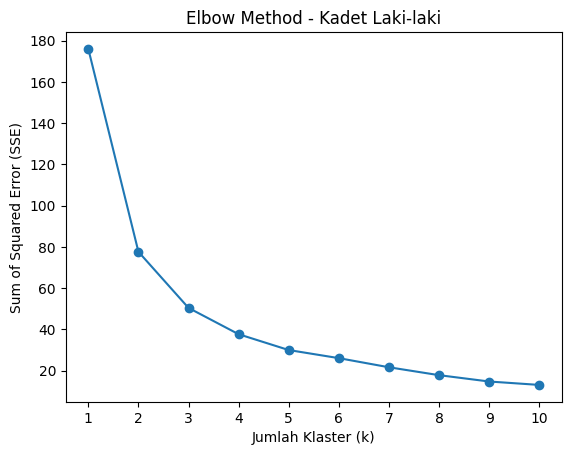


Tabel Penurunan SSE:
    k         SSE  Penurunan_SSE
0   1  176.000000            NaN
1   2   77.662576      98.337424
2   3   50.458906      27.203670
3   4   37.701998      12.756908
4   5   30.031135       7.670863
5   6   26.104690       3.926445
6   7   21.683046       4.421644
7   8   17.855180       3.827865
8   9   14.781069       3.074112
9  10   13.124439       1.656629


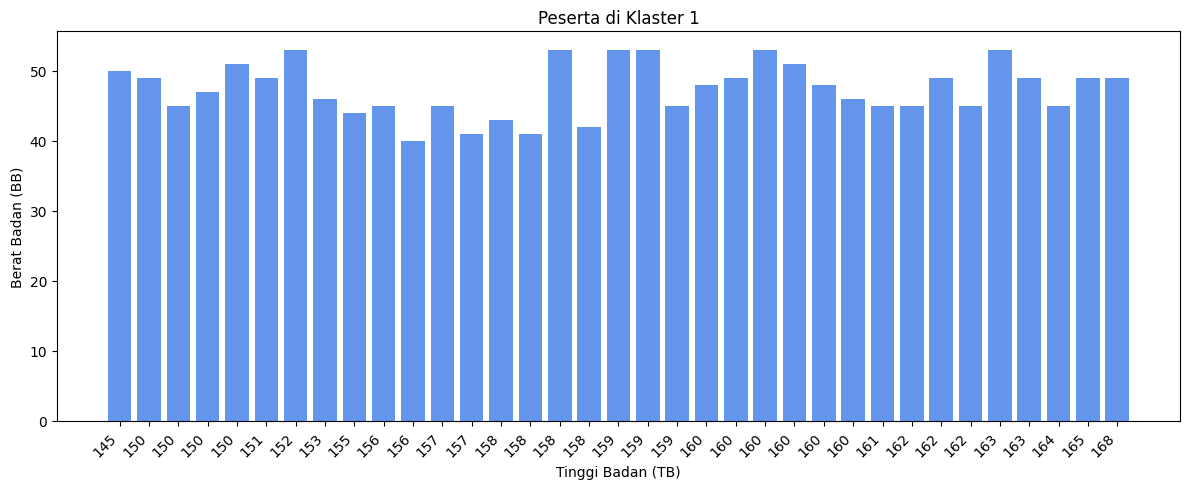


Cluster 1:
                         CLUB                                  NAMA  TAHUN  \
13                 ZTC BINJAI                    EVAN SATRIA BANGUN   2012   
51                  MAVERICKS                   TRISTAN SIMORANGKIR   2010   
84                     HASAKU       MUHAMMAD FATIR RIZAL RAIS DAYLI   2010   
85                     HASAKU                  IMAM PRASETYO JAHARI   2010   
110            Durin tonggal                       Felix Christian    2011   
114  Ar-rahman Taekwondo Club                  Alvaro Edgina Winata   2011   
127              TI BATU BARA                        GILANG PRABOWO   2011   
150                MTC SERGAI                  ZEZY ALWIANSYAH AZRI   2010   
176        RAI TAEKWONDO TEAM               Jefri  Efraim Sibarani    2012   
192     Kazoku Taekwondo Team                         Galih Affandy   2010   
193     Kazoku Taekwondo Team                          Akhdan Rafif   2010   
207               ALAM LEUSER                   M.ZA

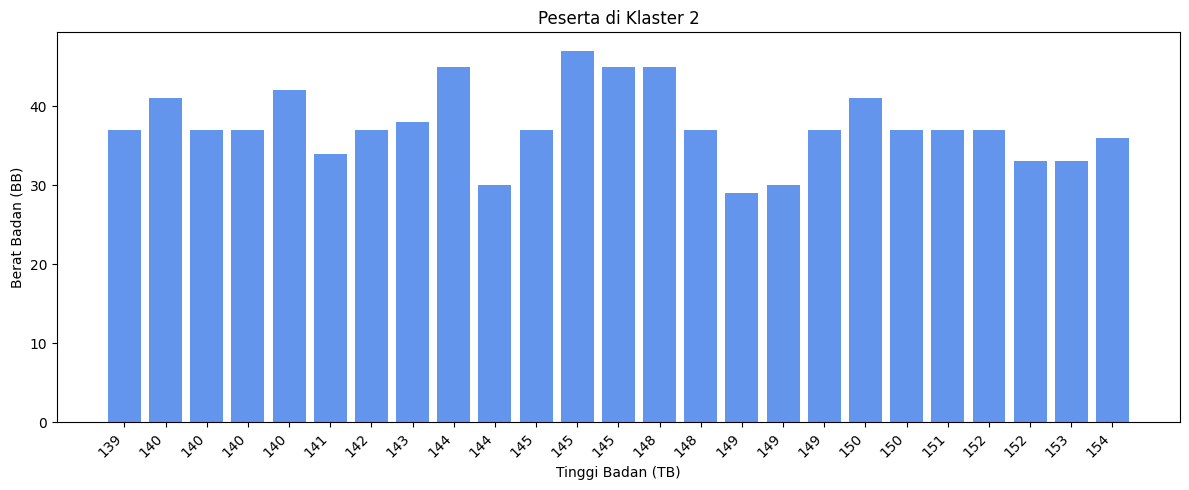


Cluster 1:
                         CLUB                                  NAMA  TAHUN  \
13                 ZTC BINJAI                    EVAN SATRIA BANGUN   2012   
51                  MAVERICKS                   TRISTAN SIMORANGKIR   2010   
84                     HASAKU       MUHAMMAD FATIR RIZAL RAIS DAYLI   2010   
85                     HASAKU                  IMAM PRASETYO JAHARI   2010   
110            Durin tonggal                       Felix Christian    2011   
114  Ar-rahman Taekwondo Club                  Alvaro Edgina Winata   2011   
127              TI BATU BARA                        GILANG PRABOWO   2011   
150                MTC SERGAI                  ZEZY ALWIANSYAH AZRI   2010   
176        RAI TAEKWONDO TEAM               Jefri  Efraim Sibarani    2012   
192     Kazoku Taekwondo Team                         Galih Affandy   2010   
193     Kazoku Taekwondo Team                          Akhdan Rafif   2010   
207               ALAM LEUSER                   M.ZA

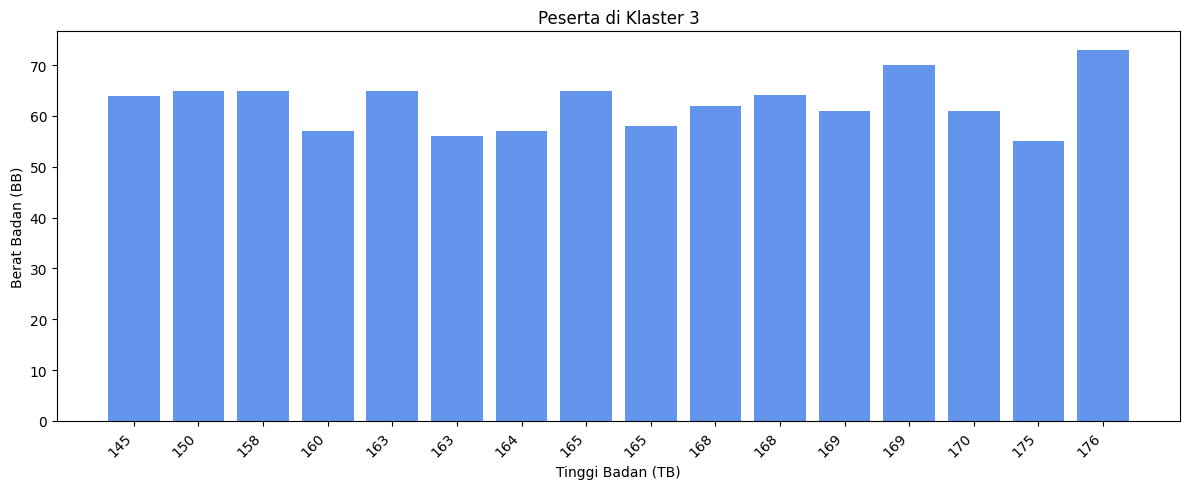


Cluster 1:
                         CLUB                                  NAMA  TAHUN  \
13                 ZTC BINJAI                    EVAN SATRIA BANGUN   2012   
51                  MAVERICKS                   TRISTAN SIMORANGKIR   2010   
84                     HASAKU       MUHAMMAD FATIR RIZAL RAIS DAYLI   2010   
85                     HASAKU                  IMAM PRASETYO JAHARI   2010   
110            Durin tonggal                       Felix Christian    2011   
114  Ar-rahman Taekwondo Club                  Alvaro Edgina Winata   2011   
127              TI BATU BARA                        GILANG PRABOWO   2011   
150                MTC SERGAI                  ZEZY ALWIANSYAH AZRI   2010   
176        RAI TAEKWONDO TEAM               Jefri  Efraim Sibarani    2012   
192     Kazoku Taekwondo Team                         Galih Affandy   2010   
193     Kazoku Taekwondo Team                          Akhdan Rafif   2010   
207               ALAM LEUSER                   M.ZA

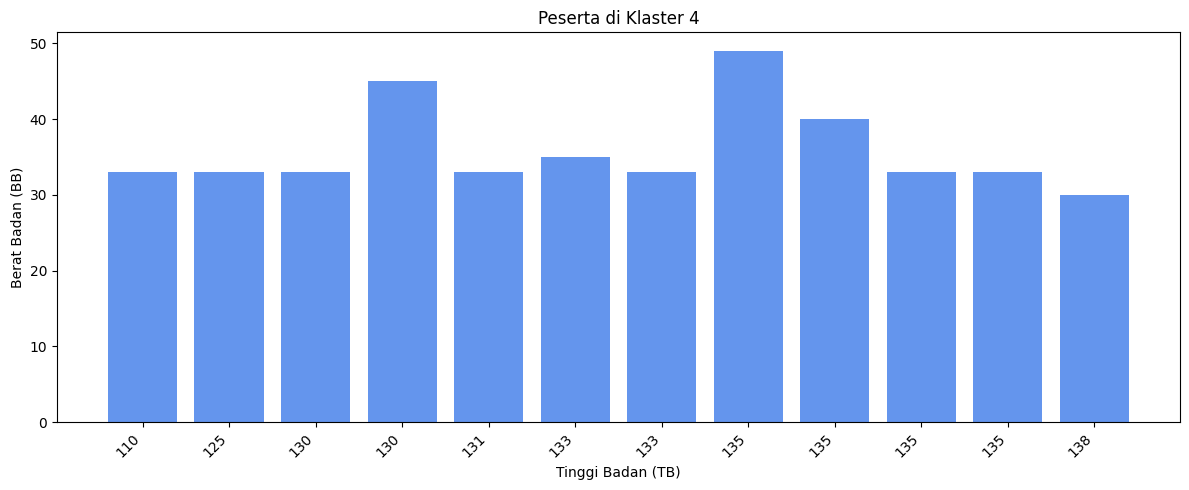


Cluster 1:
                         CLUB                                  NAMA  TAHUN  \
13                 ZTC BINJAI                    EVAN SATRIA BANGUN   2012   
51                  MAVERICKS                   TRISTAN SIMORANGKIR   2010   
84                     HASAKU       MUHAMMAD FATIR RIZAL RAIS DAYLI   2010   
85                     HASAKU                  IMAM PRASETYO JAHARI   2010   
110            Durin tonggal                       Felix Christian    2011   
114  Ar-rahman Taekwondo Club                  Alvaro Edgina Winata   2011   
127              TI BATU BARA                        GILANG PRABOWO   2011   
150                MTC SERGAI                  ZEZY ALWIANSYAH AZRI   2010   
176        RAI TAEKWONDO TEAM               Jefri  Efraim Sibarani    2012   
192     Kazoku Taekwondo Team                         Galih Affandy   2010   
193     Kazoku Taekwondo Team                          Akhdan Rafif   2010   
207               ALAM LEUSER                   M.ZA

In [146]:
# Menampilkan Kembali Jumlah Peserta
kadet_lk = df[(df['KATEGORI FESTIVAL'] == 'KADET') & (df['L/P'] == 'L')]
print(f"Jumlah peserta di kategori 'KADET' Laki-laki: {len(kadet_lk)}")

# Proses Metode Elbow
X = kadet_lk[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Kadet Laki-laki')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 4
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

kadet_lk_clustered = kadet_lk.copy()
kadet_lk_clustered['cluster'] = labels

for cluster_label in sorted(kadet_lk_clustered['cluster'].unique()):
    cluster_data = kadet_lk_clustered[kadet_lk_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(kadet_lk_clustered[kadet_lk_clustered['cluster'] == cluster_id])

### 2. PEREMPUAN

Jumlah peserta di kategori 'Kadet' Perempuan: 66


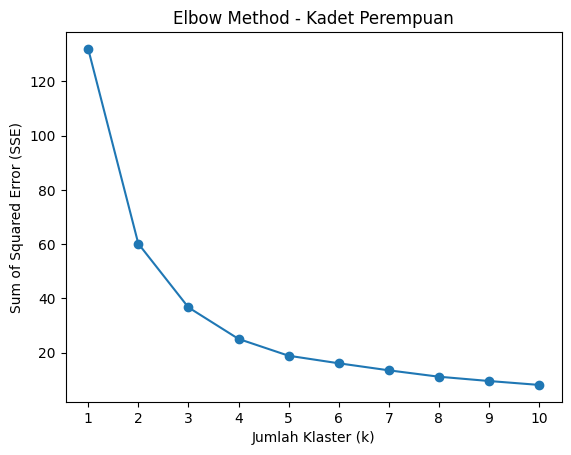


Tabel Penurunan SSE:
    k         SSE  Penurunan_SSE
0   1  132.000000            NaN
1   2   60.221956      71.778044
2   3   36.723936      23.498020
3   4   25.103875      11.620061
4   5   18.901773       6.202102
5   6   16.117033       2.784741
6   7   13.523733       2.593299
7   8   11.166804       2.356929
8   9    9.581955       1.584849
9  10    8.140019       1.441936


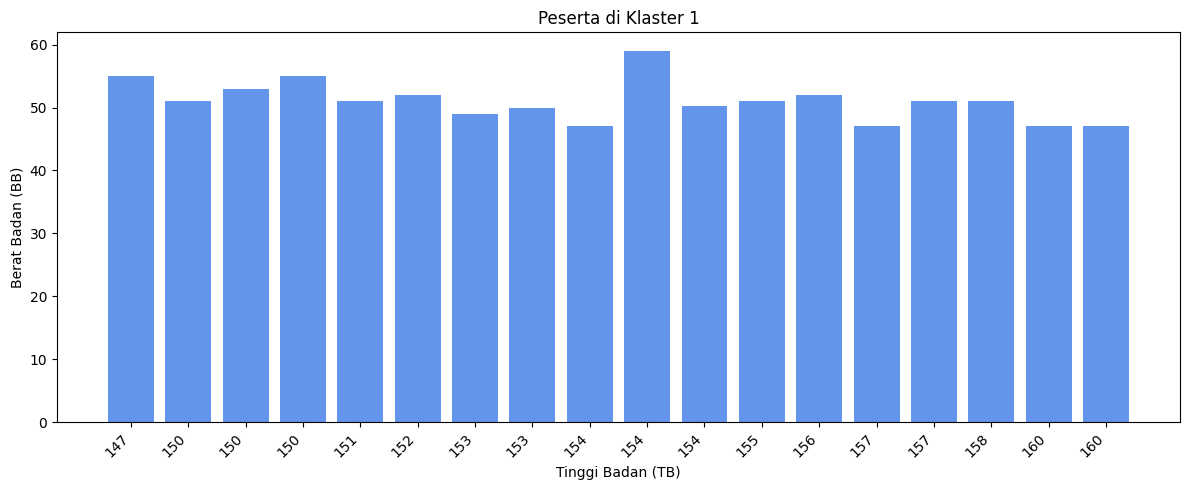


Cluster 1:
                           CLUB                          NAMA  TAHUN L/P  \
10                   ZTC BINJAI         DEARTY TABITHA TOBING   2011   P   
11                   ZTC BINJAI         FERLITA NURAINI AUZIA   2010   P   
12                   ZTC BINJAI  STEVANY PEBINA BR. SEMBIRING   2012   P   
14                   ZTC BINJAI        IRIYEL SURAMANA SITEPU   2010   P   
63                SMPN 8 BINJAI               MONICA ANDRIANI   2010   P   
129                TI BATU BARA                INAYAH FAHIRAH   2011   P   
130                TI BATU BARA               CUT SRI UMAYYAH   2011   P   
142               RAJAWALI CLUB                  Savana Putri   2012   P   
175          RAI TAEKWONDO TEAM          Indira Dwi Natasya     2011   P   
187             GRETT INDONESIA                  PUAN SADJADU   2010   P   
198       Kazoku Taekwondo Team           Kayla Agus Ramadani   2010   P   
206                 ALAM LEUSER         NAYSA NATHANIA BANGUN   2011   P   


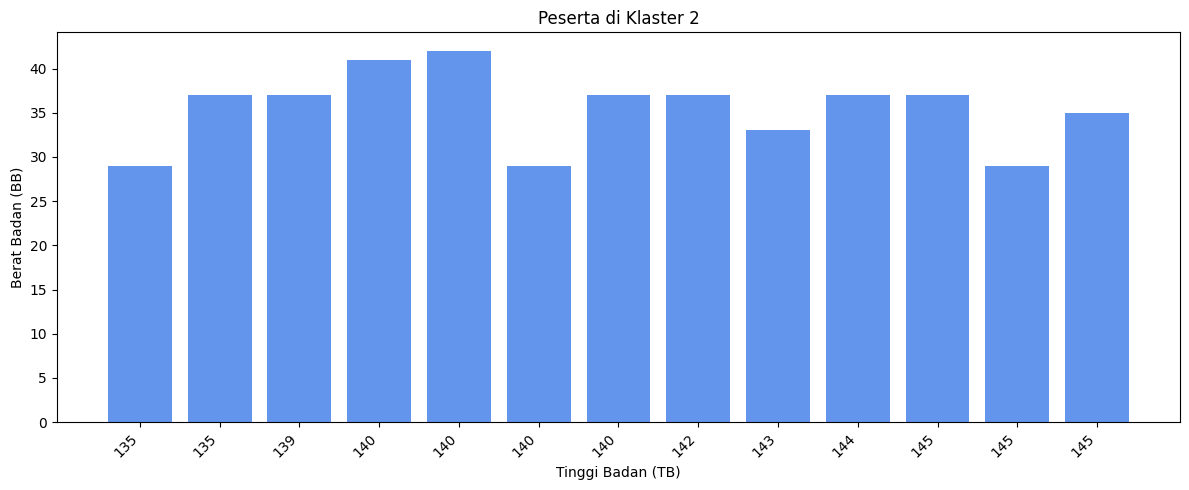


Cluster 1:
                           CLUB                          NAMA  TAHUN L/P  \
10                   ZTC BINJAI         DEARTY TABITHA TOBING   2011   P   
11                   ZTC BINJAI         FERLITA NURAINI AUZIA   2010   P   
12                   ZTC BINJAI  STEVANY PEBINA BR. SEMBIRING   2012   P   
14                   ZTC BINJAI        IRIYEL SURAMANA SITEPU   2010   P   
63                SMPN 8 BINJAI               MONICA ANDRIANI   2010   P   
129                TI BATU BARA                INAYAH FAHIRAH   2011   P   
130                TI BATU BARA               CUT SRI UMAYYAH   2011   P   
142               RAJAWALI CLUB                  Savana Putri   2012   P   
175          RAI TAEKWONDO TEAM          Indira Dwi Natasya     2011   P   
187             GRETT INDONESIA                  PUAN SADJADU   2010   P   
198       Kazoku Taekwondo Team           Kayla Agus Ramadani   2010   P   
206                 ALAM LEUSER         NAYSA NATHANIA BANGUN   2011   P   


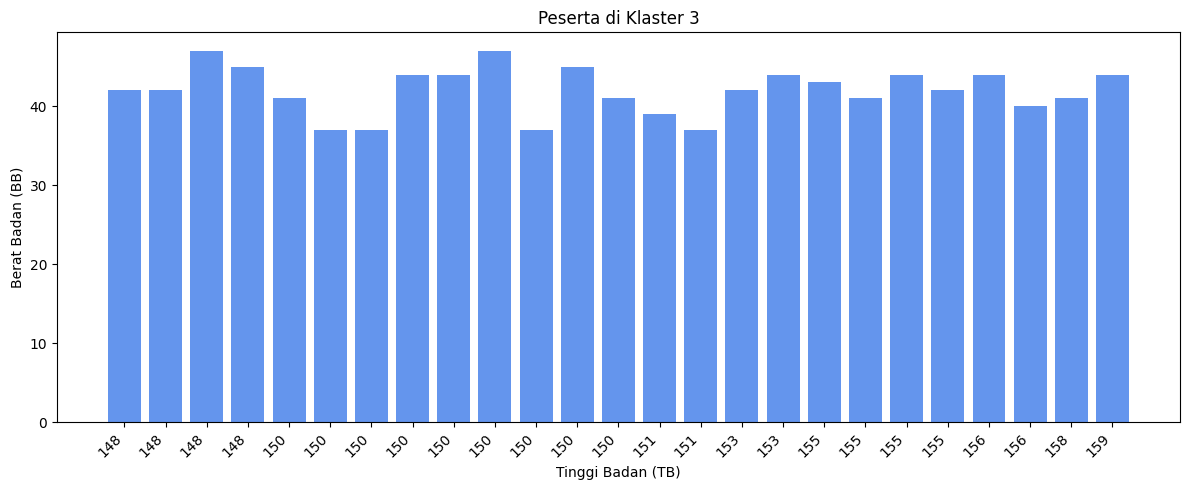


Cluster 1:
                           CLUB                          NAMA  TAHUN L/P  \
10                   ZTC BINJAI         DEARTY TABITHA TOBING   2011   P   
11                   ZTC BINJAI         FERLITA NURAINI AUZIA   2010   P   
12                   ZTC BINJAI  STEVANY PEBINA BR. SEMBIRING   2012   P   
14                   ZTC BINJAI        IRIYEL SURAMANA SITEPU   2010   P   
63                SMPN 8 BINJAI               MONICA ANDRIANI   2010   P   
129                TI BATU BARA                INAYAH FAHIRAH   2011   P   
130                TI BATU BARA               CUT SRI UMAYYAH   2011   P   
142               RAJAWALI CLUB                  Savana Putri   2012   P   
175          RAI TAEKWONDO TEAM          Indira Dwi Natasya     2011   P   
187             GRETT INDONESIA                  PUAN SADJADU   2010   P   
198       Kazoku Taekwondo Team           Kayla Agus Ramadani   2010   P   
206                 ALAM LEUSER         NAYSA NATHANIA BANGUN   2011   P   


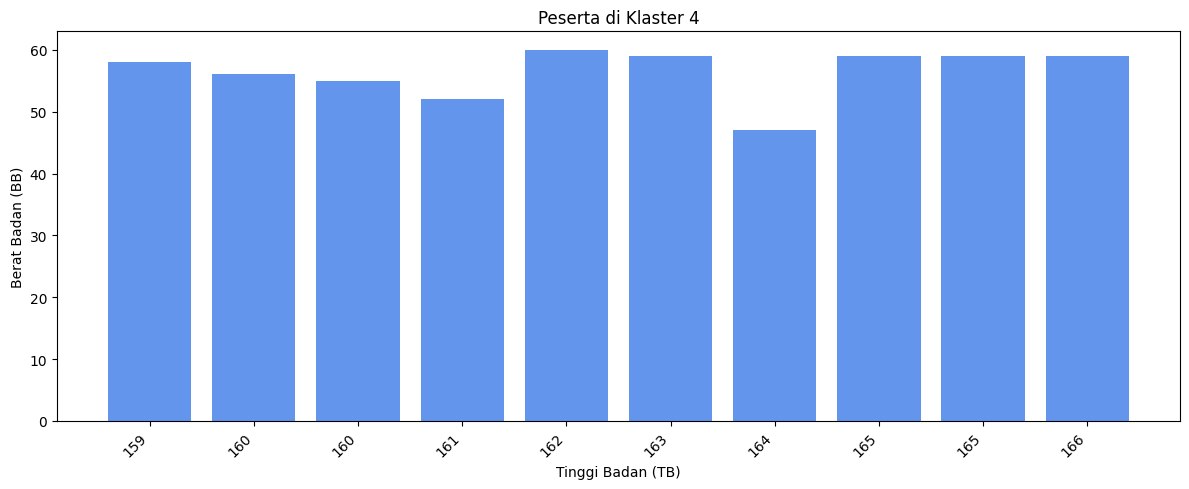


Cluster 1:
                           CLUB                          NAMA  TAHUN L/P  \
10                   ZTC BINJAI         DEARTY TABITHA TOBING   2011   P   
11                   ZTC BINJAI         FERLITA NURAINI AUZIA   2010   P   
12                   ZTC BINJAI  STEVANY PEBINA BR. SEMBIRING   2012   P   
14                   ZTC BINJAI        IRIYEL SURAMANA SITEPU   2010   P   
63                SMPN 8 BINJAI               MONICA ANDRIANI   2010   P   
129                TI BATU BARA                INAYAH FAHIRAH   2011   P   
130                TI BATU BARA               CUT SRI UMAYYAH   2011   P   
142               RAJAWALI CLUB                  Savana Putri   2012   P   
175          RAI TAEKWONDO TEAM          Indira Dwi Natasya     2011   P   
187             GRETT INDONESIA                  PUAN SADJADU   2010   P   
198       Kazoku Taekwondo Team           Kayla Agus Ramadani   2010   P   
206                 ALAM LEUSER         NAYSA NATHANIA BANGUN   2011   P   


In [147]:
# Menampilkan Kembali Jumlah Peserta
kadet_pr = df[(df['KATEGORI FESTIVAL'] == 'KADET') & (df['L/P'] == 'P')]
print(f"Jumlah peserta di kategori 'Kadet' Perempuan: {len(kadet_pr)}")

# Proses Metode Elbow
X = kadet_pr[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Kadet Perempuan')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 4
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

kadet_pr_clustered = kadet_pr.copy()
kadet_pr_clustered['cluster'] = labels

for cluster_label in sorted(kadet_pr_clustered['cluster'].unique()):
    cluster_data = kadet_pr_clustered[kadet_pr_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(kadet_pr_clustered[kadet_pr_clustered['cluster'] == cluster_id])

### **JUNIOR**

### 1. LAKI-LAKI

Jumlah peserta di kategori 'JUNIOR' Laki-laki: 75


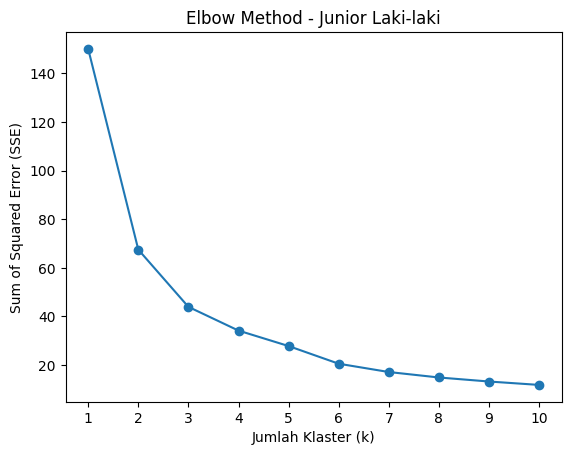


Tabel Penurunan SSE:
    k         SSE  Penurunan_SSE
0   1  150.000000            NaN
1   2   67.473237      82.526763
2   3   43.949622      23.523615
3   4   34.191488       9.758134
4   5   27.832555       6.358934
5   6   20.566080       7.266475
6   7   17.157050       3.409031
7   8   14.910369       2.246680
8   9   13.252878       1.657491
9  10   11.852547       1.400331


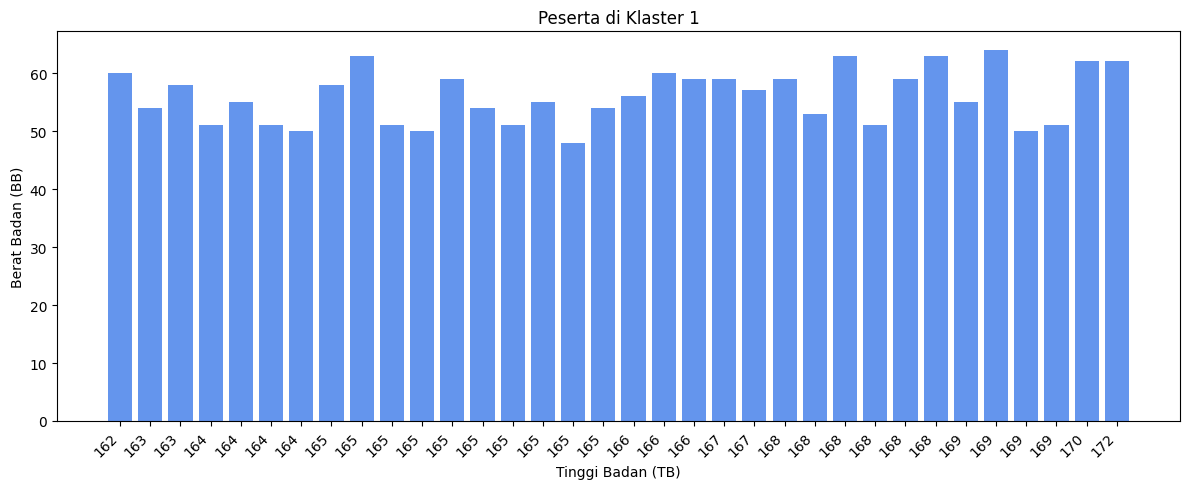


Cluster 1:
                      CLUB                                NAMA  TAHUN L/P  \
28           TKD GOR Dairi         Arnold septiawan ompusunggu   2007   L   
29           TKD GOR Dairi             Tiras Wijaya Sembiring    2009   L   
30           TKD GOR Dairi                 Hagai lumban tobing   2009   L   
31           TKD GOR Dairi             William supratno berutu   2007   L   
64           SMPN 8 BINJAI                   DECO DWI ALANSYAH   2007   L   
67          PETARUNG 0206   GABRIEL CHRISTIAN ARIESTA SITOMPUL   2009   L   
68          PETARUNG 0206                    TAMBOK HM GURNING   2009   L   
69          PETARUNG 0206          MARUBA PARDINGOTAN KUDADIRI   2007   L   
88                  HASAKU              RICHARD ALFREDO SIRAIT   2009   L   
89                  HASAKU                              ARJUNA   2008   L   
105  TAEKWONDO GOLDEN STAR                AKEYLA LUTHFI SYAFIQ   2009   L   
118   Stosa Taekwondo Club              Don juan A. Sitanggang  

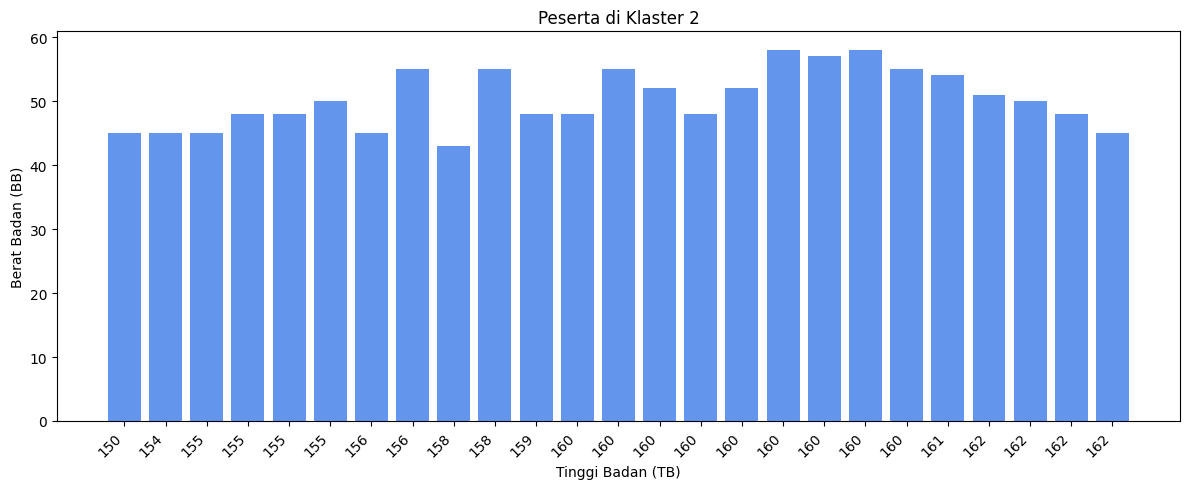


Cluster 1:
                      CLUB                                NAMA  TAHUN L/P  \
28           TKD GOR Dairi         Arnold septiawan ompusunggu   2007   L   
29           TKD GOR Dairi             Tiras Wijaya Sembiring    2009   L   
30           TKD GOR Dairi                 Hagai lumban tobing   2009   L   
31           TKD GOR Dairi             William supratno berutu   2007   L   
64           SMPN 8 BINJAI                   DECO DWI ALANSYAH   2007   L   
67          PETARUNG 0206   GABRIEL CHRISTIAN ARIESTA SITOMPUL   2009   L   
68          PETARUNG 0206                    TAMBOK HM GURNING   2009   L   
69          PETARUNG 0206          MARUBA PARDINGOTAN KUDADIRI   2007   L   
88                  HASAKU              RICHARD ALFREDO SIRAIT   2009   L   
89                  HASAKU                              ARJUNA   2008   L   
105  TAEKWONDO GOLDEN STAR                AKEYLA LUTHFI SYAFIQ   2009   L   
118   Stosa Taekwondo Club              Don juan A. Sitanggang  

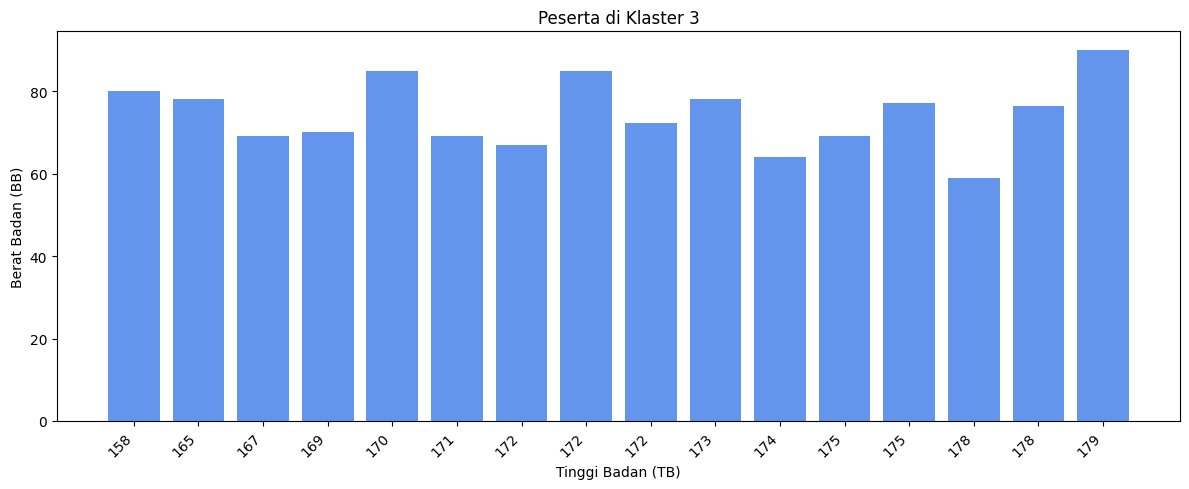


Cluster 1:
                      CLUB                                NAMA  TAHUN L/P  \
28           TKD GOR Dairi         Arnold septiawan ompusunggu   2007   L   
29           TKD GOR Dairi             Tiras Wijaya Sembiring    2009   L   
30           TKD GOR Dairi                 Hagai lumban tobing   2009   L   
31           TKD GOR Dairi             William supratno berutu   2007   L   
64           SMPN 8 BINJAI                   DECO DWI ALANSYAH   2007   L   
67          PETARUNG 0206   GABRIEL CHRISTIAN ARIESTA SITOMPUL   2009   L   
68          PETARUNG 0206                    TAMBOK HM GURNING   2009   L   
69          PETARUNG 0206          MARUBA PARDINGOTAN KUDADIRI   2007   L   
88                  HASAKU              RICHARD ALFREDO SIRAIT   2009   L   
89                  HASAKU                              ARJUNA   2008   L   
105  TAEKWONDO GOLDEN STAR                AKEYLA LUTHFI SYAFIQ   2009   L   
118   Stosa Taekwondo Club              Don juan A. Sitanggang  

In [148]:
# Menampilkan Kembali Jumlah Peserta
junior_lk = df[(df['KATEGORI FESTIVAL'] == 'JUNIOR') & (df['L/P'] == 'L')]
print(f"Jumlah peserta di kategori 'JUNIOR' Laki-laki: {len(junior_lk)}")

# Proses Metode Elbow
X = junior_lk[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Junior Laki-laki')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

junior_lk_clustered = junior_lk.copy()
junior_lk_clustered['cluster'] = labels

for cluster_label in sorted(junior_lk_clustered['cluster'].unique()):
    cluster_data = junior_lk_clustered[junior_lk_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(junior_lk_clustered[junior_lk_clustered['cluster'] == cluster_id])

### 2. PEREMPUAN

Jumlah peserta di kategori 'Junior' Perempuan: 39


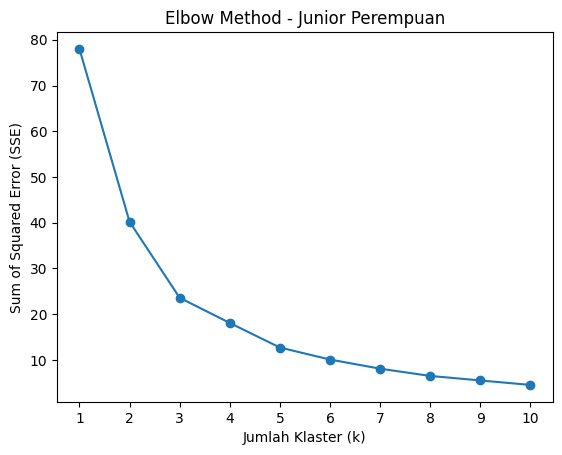


Tabel Penurunan SSE:
    k        SSE  Penurunan_SSE
0   1  78.000000            NaN
1   2  40.216209      37.783791
2   3  23.592711      16.623498
3   4  18.095656       5.497055
4   5  12.719101       5.376555
5   6  10.095970       2.623131
6   7   8.093007       2.002963
7   8   6.510932       1.582075
8   9   5.520680       0.990252
9  10   4.541974       0.978707


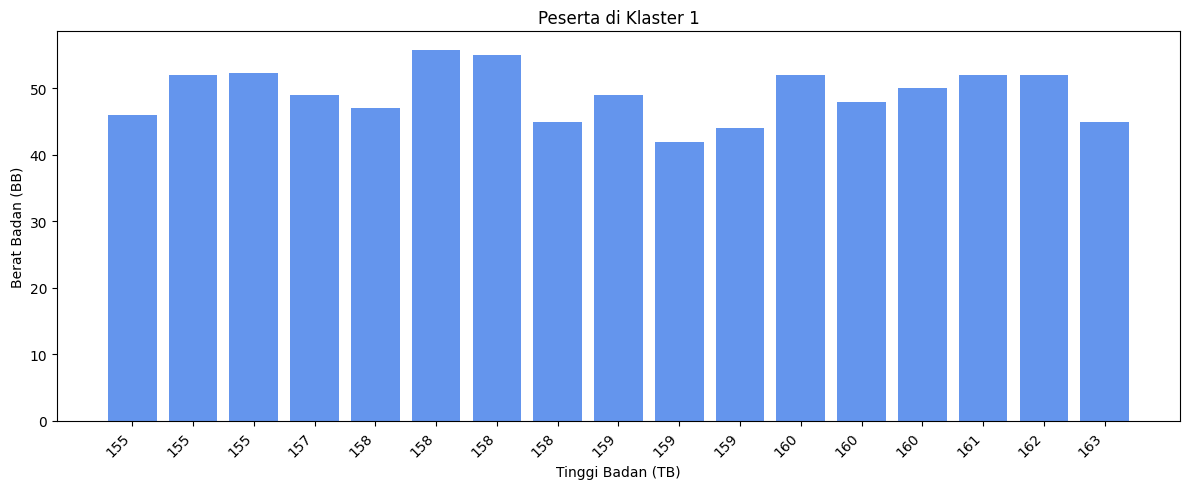


Cluster 1:
                      CLUB                           NAMA  TAHUN L/P     TB  \
16              ZTC BINJAI                HARUMI SAHPUTRI   2008   P  155.0   
32           TKD GOR Dairi  Lastri Roma Arta siringoringo   2008   P  155.0   
59       FATHUR-RAHMAN TKD            MAULIDZA AYU ANDITA   2009   P  160.0   
103  TAEKWONDO GOLDEN STAR                   YUS SYAHRANI   2008   P  158.0   
104  TAEKWONDO GOLDEN STAR                KEYLA ALIF KHAN   2008   P  162.0   
122         KUTALIMBARU TC      Geisa Afrianti Br Ketaren   2010   P  158.0   
156             MTC SERGAI      SYAVIRA SYAHIDATUN NAZILA   2009   P  163.0   
164        KHENZUA FIGHTER                TALYTHA MAISAAN   2008   P  158.0   
260  TIGER SUMATERA BINJAI                   NOVITA AIRIN   2008   P  158.0   
318     SIBAYAK LIONS CLUB           IVANA CALISTA JAWAK    2009   P  159.0   
319     SIBAYAK LIONS CLUB          VINESIA ANNA GINTING    2008   P  159.0   
320     SIBAYAK LIONS CLUB              

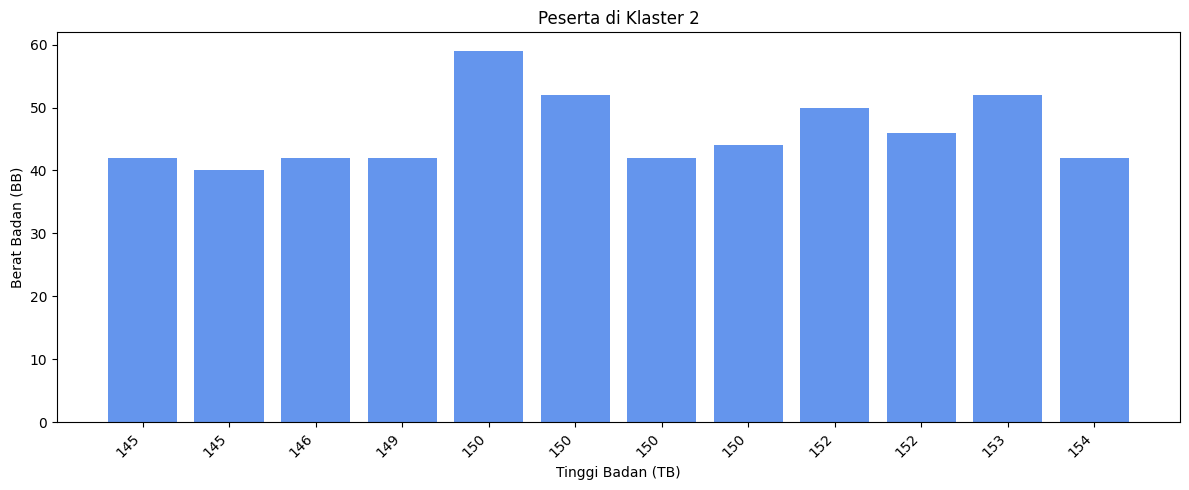


Cluster 1:
                      CLUB                           NAMA  TAHUN L/P     TB  \
16              ZTC BINJAI                HARUMI SAHPUTRI   2008   P  155.0   
32           TKD GOR Dairi  Lastri Roma Arta siringoringo   2008   P  155.0   
59       FATHUR-RAHMAN TKD            MAULIDZA AYU ANDITA   2009   P  160.0   
103  TAEKWONDO GOLDEN STAR                   YUS SYAHRANI   2008   P  158.0   
104  TAEKWONDO GOLDEN STAR                KEYLA ALIF KHAN   2008   P  162.0   
122         KUTALIMBARU TC      Geisa Afrianti Br Ketaren   2010   P  158.0   
156             MTC SERGAI      SYAVIRA SYAHIDATUN NAZILA   2009   P  163.0   
164        KHENZUA FIGHTER                TALYTHA MAISAAN   2008   P  158.0   
260  TIGER SUMATERA BINJAI                   NOVITA AIRIN   2008   P  158.0   
318     SIBAYAK LIONS CLUB           IVANA CALISTA JAWAK    2009   P  159.0   
319     SIBAYAK LIONS CLUB          VINESIA ANNA GINTING    2008   P  159.0   
320     SIBAYAK LIONS CLUB              

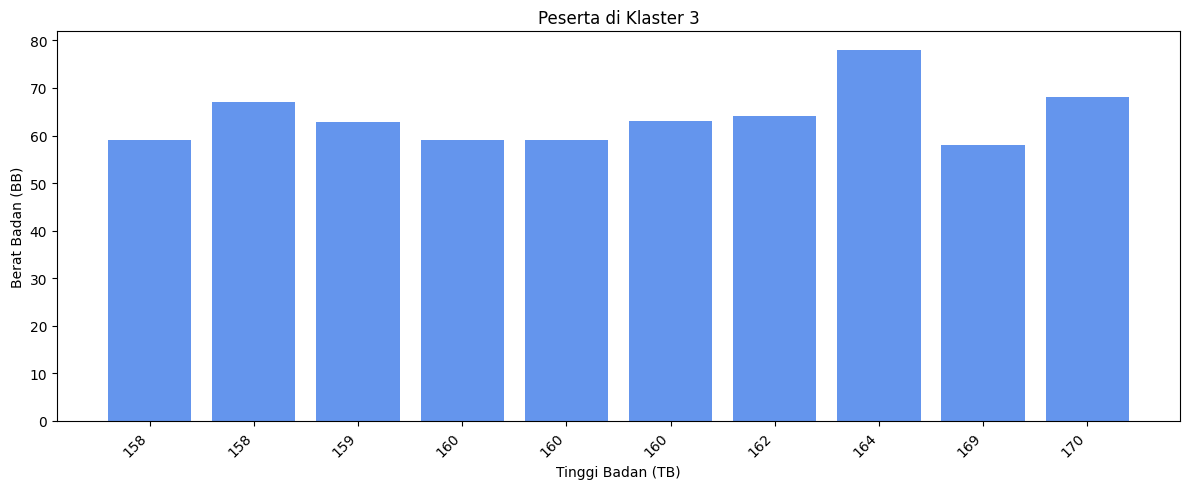


Cluster 1:
                      CLUB                           NAMA  TAHUN L/P     TB  \
16              ZTC BINJAI                HARUMI SAHPUTRI   2008   P  155.0   
32           TKD GOR Dairi  Lastri Roma Arta siringoringo   2008   P  155.0   
59       FATHUR-RAHMAN TKD            MAULIDZA AYU ANDITA   2009   P  160.0   
103  TAEKWONDO GOLDEN STAR                   YUS SYAHRANI   2008   P  158.0   
104  TAEKWONDO GOLDEN STAR                KEYLA ALIF KHAN   2008   P  162.0   
122         KUTALIMBARU TC      Geisa Afrianti Br Ketaren   2010   P  158.0   
156             MTC SERGAI      SYAVIRA SYAHIDATUN NAZILA   2009   P  163.0   
164        KHENZUA FIGHTER                TALYTHA MAISAAN   2008   P  158.0   
260  TIGER SUMATERA BINJAI                   NOVITA AIRIN   2008   P  158.0   
318     SIBAYAK LIONS CLUB           IVANA CALISTA JAWAK    2009   P  159.0   
319     SIBAYAK LIONS CLUB          VINESIA ANNA GINTING    2008   P  159.0   
320     SIBAYAK LIONS CLUB              

In [149]:
# Menampilkan Kembali Jumlah Peserta
junior_pr = df[(df['KATEGORI FESTIVAL'] == 'JUNIOR') & (df['L/P'] == 'P')]
print(f"Jumlah peserta di kategori 'Junior' Perempuan: {len(junior_pr)}")

# Proses Metode Elbow
X = junior_pr[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Junior Perempuan')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

junior_pr_clustered = junior_pr.copy()
junior_pr_clustered['cluster'] = labels

for cluster_label in sorted(junior_pr_clustered['cluster'].unique()):
    cluster_data = junior_pr_clustered[junior_pr_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(junior_pr_clustered[junior_pr_clustered['cluster'] == cluster_id])

### **SENIOR**

### 1. LAKI-LAKI

Jumlah peserta di kategori 'SENIOR' Laki-laki: 44


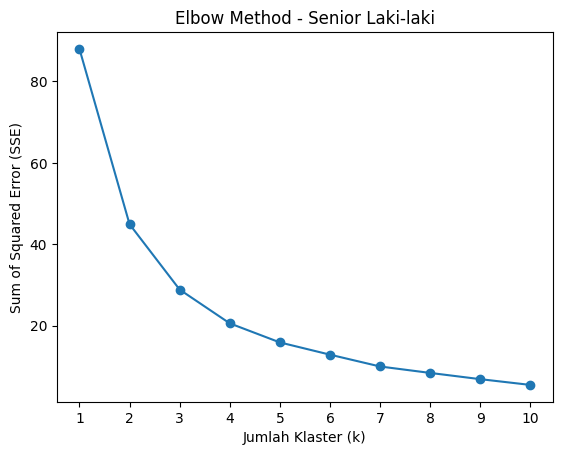


Tabel Penurunan SSE:
    k        SSE  Penurunan_SSE
0   1  88.000000            NaN
1   2  44.929179      43.070821
2   3  28.867269      16.061910
3   4  20.575835       8.291434
4   5  15.890612       4.685223
5   6  12.882876       3.007736
6   7   9.976187       2.906689
7   8   8.393604       1.582583
8   9   6.863136       1.530468
9  10   5.446953       1.416182


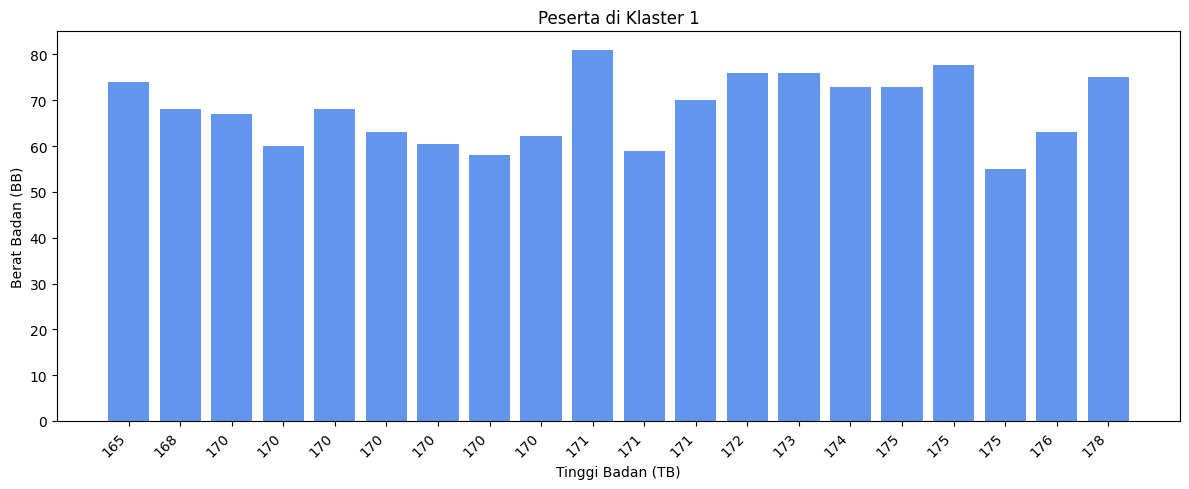


Cluster 1:
                          CLUB                                NAMA  TAHUN L/P  \
66                   FK UNMETH       Jacky Chan Nicholas Hutabarat   2006   L   
71              PETARUNG 0206               FEBRI VALENTINO MUNTHE   2004   L   
98            POLTEKBANG MEDAN          RAJA ANANDRA PUTRA GINTING   2004   L   
101           POLTEKBANG MEDAN            DEVIN FAYZUL HAQ GINTING   2004   L   
185         RAI TAEKWONDO TEAM              Ahmad Rasya Matondang    2006   L   
282          UKM TAEKWONDO USU     EZEKIEL ALDRIK SUSILO SIMARMATA   2004   L   
283          UKM TAEKWONDO USU            LEONARD JHOSUA HUTABARAT   2005   L   
418             UNPRI TKD CLUB                  Ahmad Yusuf Fauzan   2005   L   
419             UNPRI TKD CLUB              James Piter Simatupang   2003   L   
445              Taekwondo UMA                      Rizky Abdillah   2003   L   
471     HUMAIRA TAEKWONDO CLUB                   M. ADNAN HASIBUAN   2005   L   
473  Upm.Univ.Pa

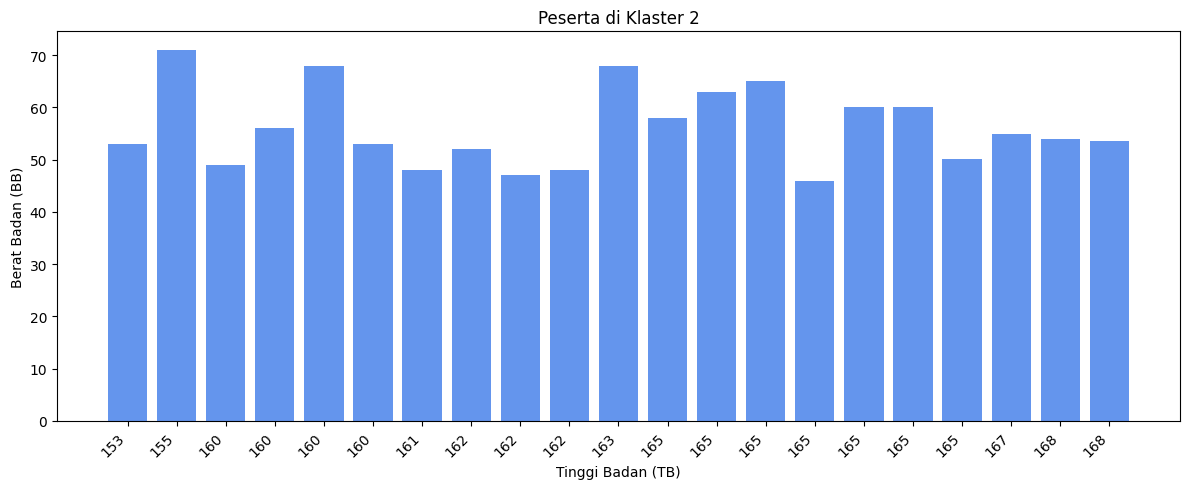


Cluster 1:
                          CLUB                                NAMA  TAHUN L/P  \
66                   FK UNMETH       Jacky Chan Nicholas Hutabarat   2006   L   
71              PETARUNG 0206               FEBRI VALENTINO MUNTHE   2004   L   
98            POLTEKBANG MEDAN          RAJA ANANDRA PUTRA GINTING   2004   L   
101           POLTEKBANG MEDAN            DEVIN FAYZUL HAQ GINTING   2004   L   
185         RAI TAEKWONDO TEAM              Ahmad Rasya Matondang    2006   L   
282          UKM TAEKWONDO USU     EZEKIEL ALDRIK SUSILO SIMARMATA   2004   L   
283          UKM TAEKWONDO USU            LEONARD JHOSUA HUTABARAT   2005   L   
418             UNPRI TKD CLUB                  Ahmad Yusuf Fauzan   2005   L   
419             UNPRI TKD CLUB              James Piter Simatupang   2003   L   
445              Taekwondo UMA                      Rizky Abdillah   2003   L   
471     HUMAIRA TAEKWONDO CLUB                   M. ADNAN HASIBUAN   2005   L   
473  Upm.Univ.Pa

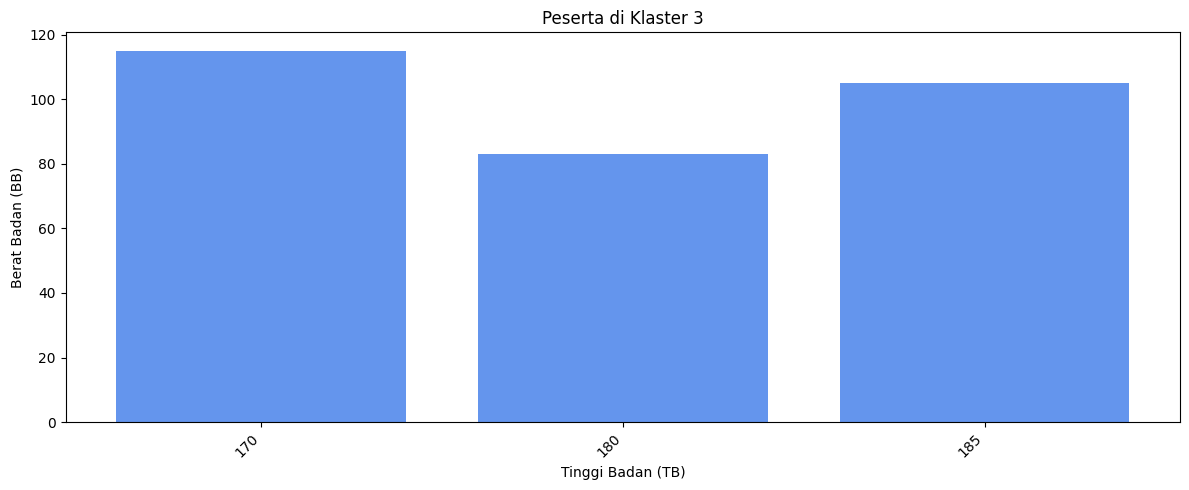


Cluster 1:
                          CLUB                                NAMA  TAHUN L/P  \
66                   FK UNMETH       Jacky Chan Nicholas Hutabarat   2006   L   
71              PETARUNG 0206               FEBRI VALENTINO MUNTHE   2004   L   
98            POLTEKBANG MEDAN          RAJA ANANDRA PUTRA GINTING   2004   L   
101           POLTEKBANG MEDAN            DEVIN FAYZUL HAQ GINTING   2004   L   
185         RAI TAEKWONDO TEAM              Ahmad Rasya Matondang    2006   L   
282          UKM TAEKWONDO USU     EZEKIEL ALDRIK SUSILO SIMARMATA   2004   L   
283          UKM TAEKWONDO USU            LEONARD JHOSUA HUTABARAT   2005   L   
418             UNPRI TKD CLUB                  Ahmad Yusuf Fauzan   2005   L   
419             UNPRI TKD CLUB              James Piter Simatupang   2003   L   
445              Taekwondo UMA                      Rizky Abdillah   2003   L   
471     HUMAIRA TAEKWONDO CLUB                   M. ADNAN HASIBUAN   2005   L   
473  Upm.Univ.Pa

In [150]:
# Menampilkan Kembali Jumlah Peserta
senior_lk = df[(df['KATEGORI FESTIVAL'] == 'SENIOR') & (df['L/P'] == 'L')]
print(f"Jumlah peserta di kategori 'SENIOR' Laki-laki: {len(senior_lk)}")

# Proses Metode Elbow
X = senior_lk[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Senior Laki-laki')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

senior_lk_clustered = senior_lk.copy()
senior_lk_clustered['cluster'] = labels

for cluster_label in sorted(senior_lk_clustered['cluster'].unique()):
    cluster_data = senior_lk_clustered[senior_lk_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(senior_lk_clustered[senior_lk_clustered['cluster'] == cluster_id])

### 2. PEREMPUAN

Jumlah peserta di kategori 'Senior' Perempuan: 29


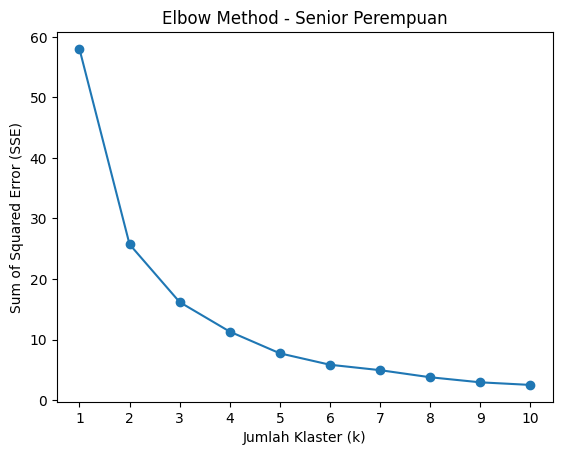


Tabel Penurunan SSE:
    k        SSE  Penurunan_SSE
0   1  58.000000            NaN
1   2  25.724518      32.275482
2   3  16.181514       9.543004
3   4  11.305686       4.875828
4   5   7.719874       3.585813
5   6   5.833518       1.886356
6   7   4.939463       0.894054
7   8   3.767286       1.172178
8   9   2.930660       0.836626
9  10   2.501234       0.429426


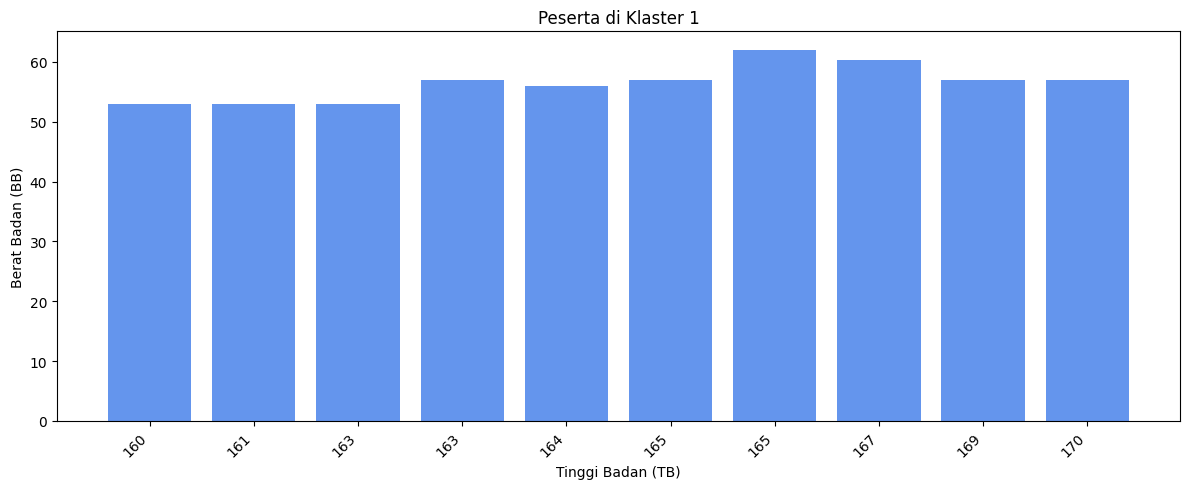


Cluster 1:
                          CLUB                            NAMA  TAHUN L/P  \
56                   MAVERICKS            DITA ULI LUMBAN GAOL   2006   P   
100           POLTEKBANG MEDAN          EMIYA ANGELITA TARIGAN   2005   P   
280          UKM TAEKWONDO USU       ANATASYA RONATAMA SITORUS   2005   P   
446              Taekwondo UMA             Lira Perna Manurung   2004   P   
474  Upm.Univ.Panca Budi Medan                NIA AGUSTRI LASE   2004   P   
480                   MIKRONOM                  Nelly Agustina   2003   P   
482                   MIKRONOM          Rotua Eka Wati Sitorus   2004   P   
499                   MIKRONOM  Tesya Esra Afriliyani Tambunan   2005   P   
500                   MIKRONOM                RentianaHasugian   2005   P   
501                   MIKRONOM                     Dhea Lovita   2003   P   

        TB    BB KATEGORI FESTIVAL  cluster  
56   163.0  57.0            SENIOR        0  
100  161.0  53.0            SENIOR        0  
28

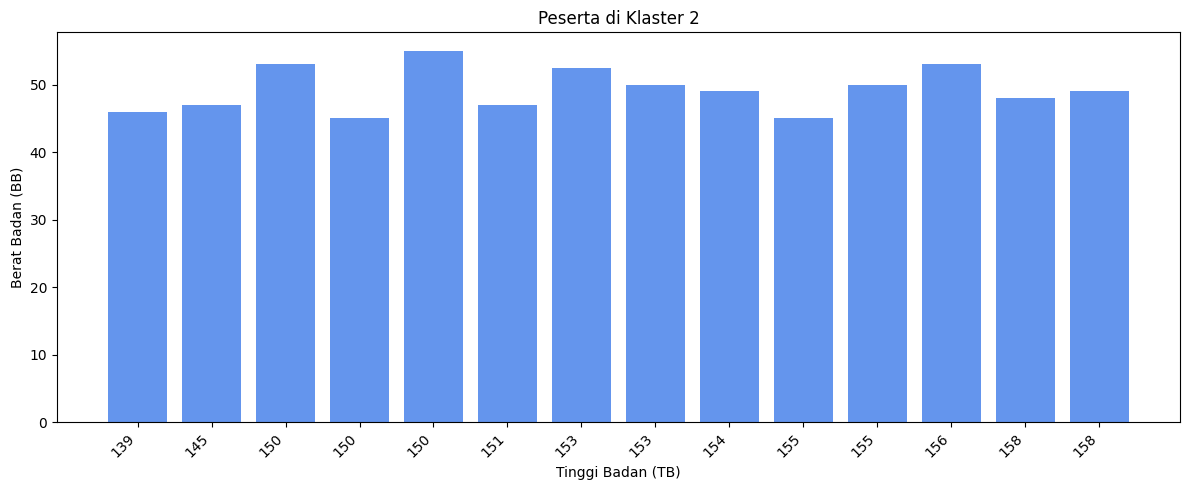


Cluster 1:
                          CLUB                            NAMA  TAHUN L/P  \
56                   MAVERICKS            DITA ULI LUMBAN GAOL   2006   P   
100           POLTEKBANG MEDAN          EMIYA ANGELITA TARIGAN   2005   P   
280          UKM TAEKWONDO USU       ANATASYA RONATAMA SITORUS   2005   P   
446              Taekwondo UMA             Lira Perna Manurung   2004   P   
474  Upm.Univ.Panca Budi Medan                NIA AGUSTRI LASE   2004   P   
480                   MIKRONOM                  Nelly Agustina   2003   P   
482                   MIKRONOM          Rotua Eka Wati Sitorus   2004   P   
499                   MIKRONOM  Tesya Esra Afriliyani Tambunan   2005   P   
500                   MIKRONOM                RentianaHasugian   2005   P   
501                   MIKRONOM                     Dhea Lovita   2003   P   

        TB    BB KATEGORI FESTIVAL  cluster  
56   163.0  57.0            SENIOR        0  
100  161.0  53.0            SENIOR        0  
28

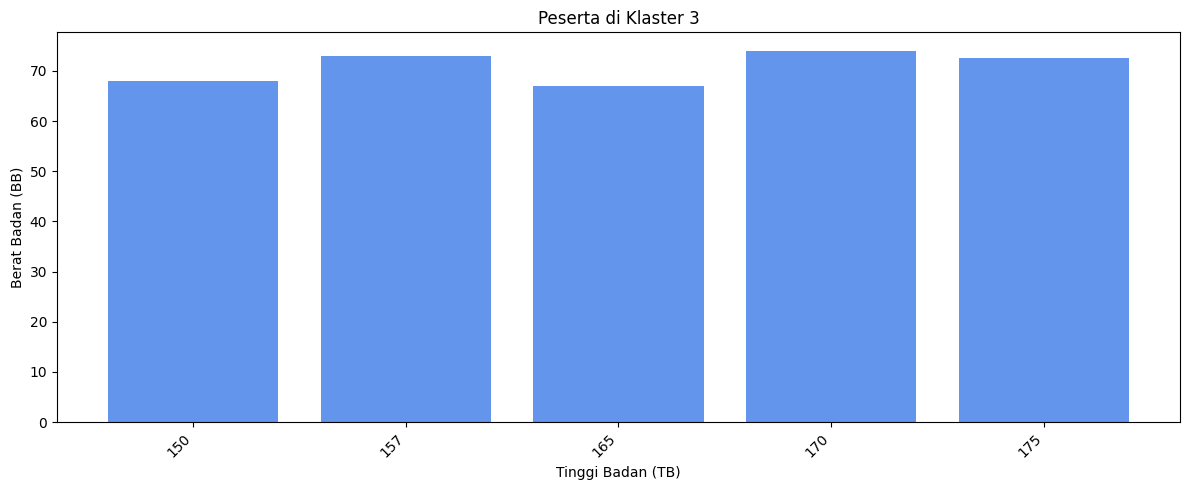


Cluster 1:
                          CLUB                            NAMA  TAHUN L/P  \
56                   MAVERICKS            DITA ULI LUMBAN GAOL   2006   P   
100           POLTEKBANG MEDAN          EMIYA ANGELITA TARIGAN   2005   P   
280          UKM TAEKWONDO USU       ANATASYA RONATAMA SITORUS   2005   P   
446              Taekwondo UMA             Lira Perna Manurung   2004   P   
474  Upm.Univ.Panca Budi Medan                NIA AGUSTRI LASE   2004   P   
480                   MIKRONOM                  Nelly Agustina   2003   P   
482                   MIKRONOM          Rotua Eka Wati Sitorus   2004   P   
499                   MIKRONOM  Tesya Esra Afriliyani Tambunan   2005   P   
500                   MIKRONOM                RentianaHasugian   2005   P   
501                   MIKRONOM                     Dhea Lovita   2003   P   

        TB    BB KATEGORI FESTIVAL  cluster  
56   163.0  57.0            SENIOR        0  
100  161.0  53.0            SENIOR        0  
28

In [151]:
# Menampilkan Kembali Jumlah Peserta
senior_pr = df[(df['KATEGORI FESTIVAL'] == 'SENIOR') & (df['L/P'] == 'P')]
print(f"Jumlah peserta di kategori 'Senior' Perempuan: {len(senior_pr)}")

#Proses Metode Elbow
X = senior_pr[['TB', 'BB']]
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xticks(range(1, 11))
plt.title('Elbow Method - Senior Perempuan')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

# Menghitung Nilai SSE
sse_diff = [np.nan] + [inertia[i - 1] - inertia[i] for i in range(1, len(inertia))]
sse_df = pd.DataFrame({
    'k': range(1, len(inertia) + 1),
    'SSE': inertia,
    'Penurunan_SSE': sse_diff
})
print("\nTabel Penurunan SSE:")
print(sse_df)

# Pembuatan Klaster
k_manual = 3
kmeans = KMeans(n_clusters=k_manual, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

senior_pr_clustered = senior_pr.copy()
senior_pr_clustered['cluster'] = labels

for cluster_label in sorted(senior_pr_clustered['cluster'].unique()):
    cluster_data = senior_pr_clustered[senior_pr_clustered['cluster'] == cluster_label]

    # Mengurutkan berdasarkan TB
    cluster_data = cluster_data.sort_values(by='TB').reset_index(drop=True)
    tb_values = cluster_data['TB'].astype(int)
    bb_values = cluster_data['BB'].values

    x_pos = range(len(cluster_data))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, bb_values, color='cornflowerblue')

    plt.xticks(x_pos, tb_values.astype(str), rotation=45, ha='right')
    plt.title(f'Peserta di Klaster {cluster_label + 1}')
    plt.xlabel('Tinggi Badan (TB)')
    plt.ylabel('Berat Badan (BB)')
    plt.tight_layout()
    plt.show()

    for cluster_id in range(k_manual):
        print(f"\nCluster {cluster_id + 1}:")
        print(senior_pr_clustered[senior_pr_clustered['cluster'] == cluster_id])

# SEMUA TABEL

In [152]:
def save_cluster_results(dataframe, filename):
    dataframe.to_csv(filename, index=False)
    print(f"\nHasil klastering telah disimpan ke: {filename}")

# Prakadet A Lk
print("\nTabel Klaster Prakadet A Laki-laki:")
save_cluster_results(prakadet_a_lk_clustered, '/content/prakadet_a_lk_clusters.csv')

# Prakadet A Pr
print("\nTabel Klaster Prakadet A Perempuan:")
save_cluster_results(prakadet_a_pr_clustered, '/content/prakadet_a_pr_clusters.csv')

# Prakadet B LK
print("\nTabel Klaster Prakadet B Laki-laki:")
save_cluster_results(prakadet_b_lk_clustered, '/content/prakadet_b_lk_clusters.csv')

# Prakadet B Pr
print("\nTabel Klaster Prakadet B Perempuan:")
save_cluster_results(prakadet_b_pr_clustered, '/content/prakadet_b_pr_clusters.csv')

# Prakadet C Lk
print("\nTabel Klaster Prakadet C Laki-laki:")
save_cluster_results(prakadet_c_lk_clustered, '/content/prakadet_c_lk_clusters.csv')

# Prakadet C Pr
print("\nTabel Klaster Prakadet C Perempuan:")
save_cluster_results(prakadet_c_pr_clustered, '/content/prakadet_c_pr_clusters.csv')

# Kadet Lk
print("\nTabel Klaster Kadet Laki-laki:")
save_cluster_results(kadet_lk_clustered, '/content/kadet_lk_clusters.csv')

# Kadet Pr
print("\nTabel Klaster Kadet Perempuan:")
save_cluster_results(kadet_pr_clustered, '/content/kadet_pr_clusters.csv')

# Junior Lk
print("\nTabel Klaster Junior Laki-laki:")
save_cluster_results(junior_lk_clustered, '/content/junior_lk_clusters.csv')

# Junior Pr
print("\nTabel Klaster Junior Perempuan:")
save_cluster_results(junior_pr_clustered, '/content/junior_pr_clusters.csv')

# Senior Lk
print("\nTabel Klaster Senior Laki-laki:")
save_cluster_results(senior_lk_clustered, '/content/senior_lk_clusters.csv')

# Senior Pr
print("\nTabel Klaster Senior Perempuan:")
save_cluster_results(senior_pr_clustered, '/content/senior_pr_clusters.csv')


Tabel Klaster Prakadet A Laki-laki:

Hasil klastering telah disimpan ke: /content/prakadet_a_lk_clusters.csv

Tabel Klaster Prakadet A Perempuan:

Hasil klastering telah disimpan ke: /content/prakadet_a_pr_clusters.csv

Tabel Klaster Prakadet B Laki-laki:

Hasil klastering telah disimpan ke: /content/prakadet_b_lk_clusters.csv

Tabel Klaster Prakadet B Perempuan:

Hasil klastering telah disimpan ke: /content/prakadet_b_pr_clusters.csv

Tabel Klaster Prakadet C Laki-laki:

Hasil klastering telah disimpan ke: /content/prakadet_c_lk_clusters.csv

Tabel Klaster Prakadet C Perempuan:

Hasil klastering telah disimpan ke: /content/prakadet_c_pr_clusters.csv

Tabel Klaster Kadet Laki-laki:

Hasil klastering telah disimpan ke: /content/kadet_lk_clusters.csv

Tabel Klaster Kadet Perempuan:

Hasil klastering telah disimpan ke: /content/kadet_pr_clusters.csv

Tabel Klaster Junior Laki-laki:

Hasil klastering telah disimpan ke: /content/junior_lk_clusters.csv

Tabel Klaster Junior Perempuan:

Hasi